# Seaborn - Data Visualization - 18 plots

**In this notebook we are going to visualize data by plotting different types of plots using Seaborn**

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import matplotlib as mpl

## Loading Data

In [2]:
#Loading all the necessary data
pokemon_data = pd.read_csv("./data/pokemon_updated.csv")
student_data = pd.read_csv("./data/studentp.csv")
countries_aggr_data = pd.read_csv("./data/countries-aggregated.csv",index_col="Date",parse_dates=True)
housing_data = pd.read_csv("./data/housing.csv")
insurance_data = pd.read_csv("./data/insurance.csv")
helpdesk_data = pd.read_csv("./data/helpdesk.csv")
fish_data = pd.read_csv("./data/fish.csv")
canada_data = pd.read_csv("./data/canada.csv")
spotify_data = pd.read_csv("./data/spotify.csv",index_col="Date",parse_dates=True)
unemployment_data = pd.read_excel("./data/unemployment.xlsx")
exercise_data = pd.read_csv("./data/exercise.csv")
suicide_data = pd.read_csv("./data/suicide.csv")
life_exp_data = pd.read_csv("./data/Life Expectancy Data.csv")
adult_data = pd.read_csv("./data/adult.csv")
iris_data = sns.load_dataset("iris")
cars_data = pd.read_csv("./data/cars.csv")

## Processing data

In [3]:
canada_data.drop(columns=['Type','Coverage','AREA',"AreaName",'DEV','REG','RegName','DevName'],inplace=True) #dropping unnescessary columns
#Changing the column name and make it as a column
canada_data.rename(columns={'OdName':'Country'},inplace=True)
canada_data.set_index(canada_data.Country,inplace=True)

# dropping country column in data
canada_data.index.name=None
del canada_data['Country']

# Transposing the data row to columns
canada_data = canada_data.transpose()
canada_data.head()


Afghanistan  Albania  Algeria  American Samoa  Andorra  Angola  \
1980           16        1       80               0        0       1   
1981           39        0       67               1        0       3   
1982           39        0       71               0        0       6   
1983           47        0       69               0        0       6   
1984           71        0       63               0        0       4   

      Antigua and Barbuda  Argentina  Armenia  Australia  ...  Uzbekistan  \
1980                    0        368        0        702  ...           0   
1981                    0        426        0        639  ...           0   
1982                    0        626        0        484  ...           0   
1983                    0        241        0        317  ...           0   
1984                   42        237        0        317  ...           0   

      Vanuatu  Venezuela (Bolivarian Republic of)  Viet Nam  Western Sahara  \
1980        0                                 103      1191               0   
1981        0                                 117      1829               0   
1982        0                                 174      2162               0   
1983        0                                 124      3404               0   
1984        0                                 142      7583               0   

      Yemen  Zambia  Zimbabwe  Unknown   Total  
1980      1      11        72    44000  143137  
1981      2      17       114    18078  128641  
1982      1      11       102    16904  121175  
1983      6       7        44    13635   89185  
1984      0      16        32    14855   88272  

[5 rows x 197 columns]

In [4]:
# Selecting rows which are having workclass as a Private , State-gov,Federal-gov
adult_data = adult_data[adult_data['workclass'].isin(['Private','State-gov','Federal-gov'])]

In [5]:
# Creating simple data using numpy
x1 = np.linspace(0,10,1000)
x2 = np.sin(x1)
df = pd.DataFrame({'input':x1,'target':x2})
df.head()

input    target
0  0.00000  0.000000
1  0.01001  0.010010
2  0.02002  0.020019
3  0.03003  0.030026
4  0.04004  0.040029

## Lineplot

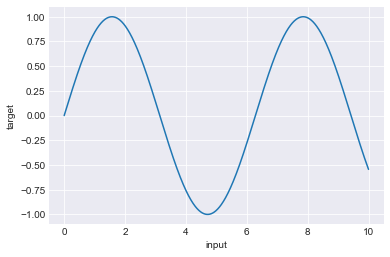

In [6]:
# making line plot using seaborn
plt.style.use('seaborn-darkgrid') # setting background theme using matplotlib package
sns.lineplot(x=df.input,y=df.target,data=df)
plt.show()

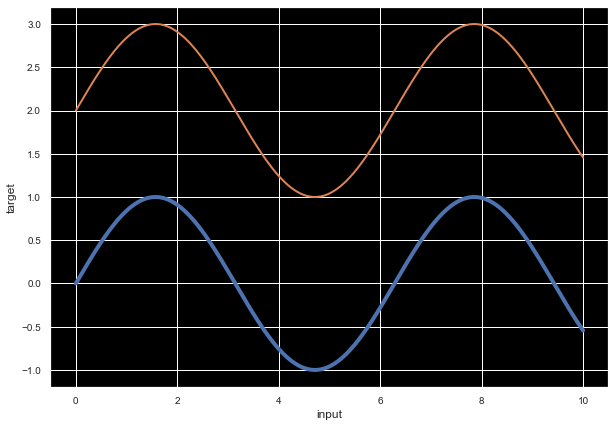

In [7]:
"""
Changing the background color of the plot
axes.facecolor - background color of the plot 
axes.grid - is used for grid line behind the plot

Plotting two line plots in one plot
"""

plt.figure(figsize=(10,7)) # size of the plot W,H
sns.set(rc={'axes.facecolor':'#000','axes.grid':True,
           'xtick.labelsize':10,'ytick.labelsize':10})
sns.lineplot(x=df.input,y=df.target, data = df , linewidth=4)
sns.lineplot(x=df.input,y=df.target+2,data = df,linewidth = 2)
plt.show()

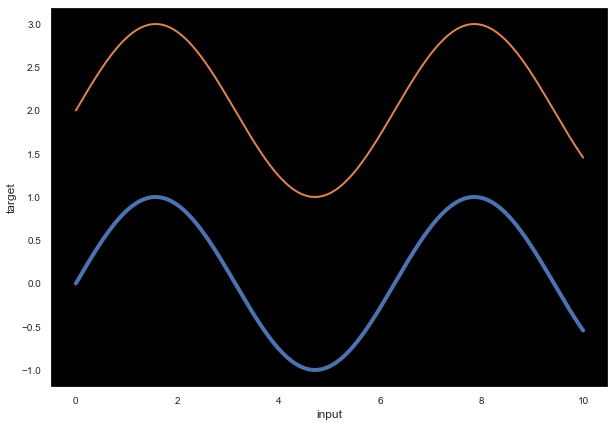

In [10]:
# Turn off the grid lines using axes.grid= False
plt.figure(figsize=(10,7))
sns.set(rc={'axes.facecolor':'#000','axes.grid':False,
           'xtick.labelsize':10,'ytick.labelsize':10})
sns.lineplot(x=df.input,y=df.target, data=df , linewidth=4)
sns.lineplot(x=df.input,y=df.target+2,data=df,linewidth = 2)
plt.show()

In [11]:
# Recover default matplotlib settings
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [12]:
spotify_data.tail()

Shape of You  Despacito  Something Just Like This    HUMBLE.  \
Date                                                                       
2018-01-05       4492978  3450315.0                 2408365.0  2685857.0   
2018-01-06       4416476  3394284.0                 2188035.0  2559044.0   
2018-01-07       4009104  3020789.0                 1908129.0  2350985.0   
2018-01-08       4135505  2755266.0                 2023251.0  2523265.0   
2018-01-09       4168506  2791601.0                 2058016.0  2727678.0   

            Unforgettable  
Date                       
2018-01-05      2869783.0  
2018-01-06      2743748.0  
2018-01-07      2441045.0  
2018-01-08      2622693.0  
2018-01-09      2627334.0

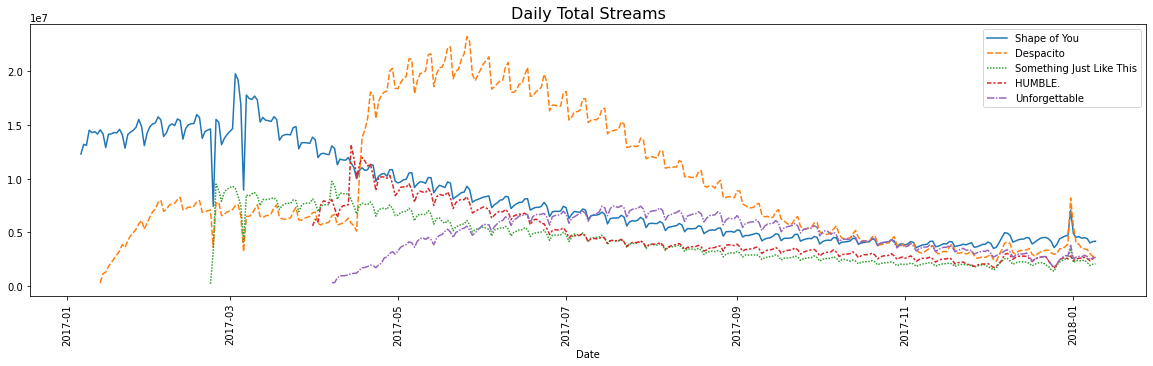

In [13]:
"""
    Plotting all the data in spotify_data by using one command
    if we use matplotlib it would require multiple lines of code to acheive the same.
"""
plt.figure(figsize=(20,5))
sns.lineplot(data=spotify_data)
plt.title('Daily Total Streams',fontsize=16) # Setting title of the plot
plt.xticks(rotation=90) # changing the direction of the xlabel - to avoid overlapping on the other label
plt.show()

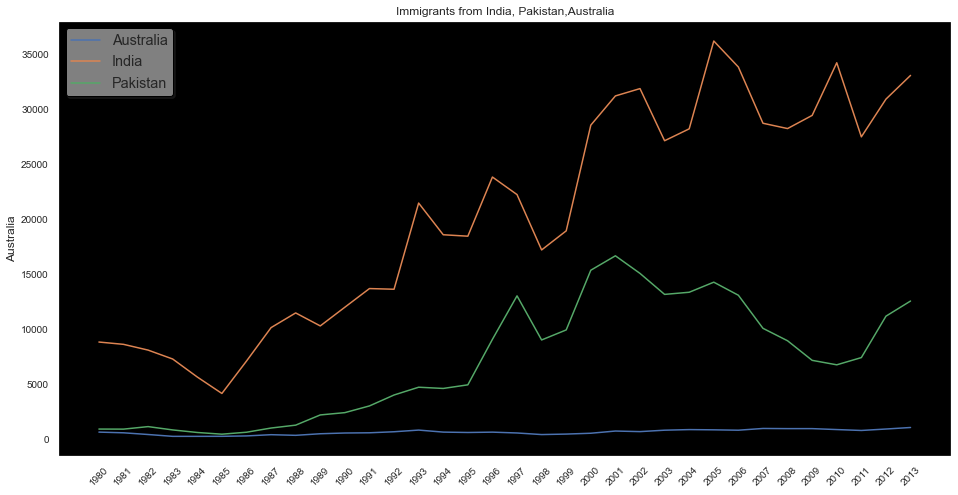

In [14]:
"""
   Filtering rows by Country column using pandas 
    Changing the legend default styling by using plt.legend function
"""

sns.set(rc={"axes.facecolor":"#000","xtick.labelsize":10,
           'ytick.labelsize':10,"axes.grid":False})
plt.figure(figsize=(16,8))
plt.title('Immigrants from India, Pakistan,Australia')
plt.xticks(rotation=45)
sns.lineplot(x=canada_data.index.values,y=canada_data['Australia'],label='Australia')
sns.lineplot(x=canada_data.index.values,y=canada_data['India'],label='India')
sns.lineplot(x=canada_data.index.values,y=canada_data['Pakistan'],label='Pakistan')
plt.legend(facecolor="grey",fontsize='large',shadow=True,edgecolor='black')
plt.show()

In [15]:
# Recover default matplotlib settings
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

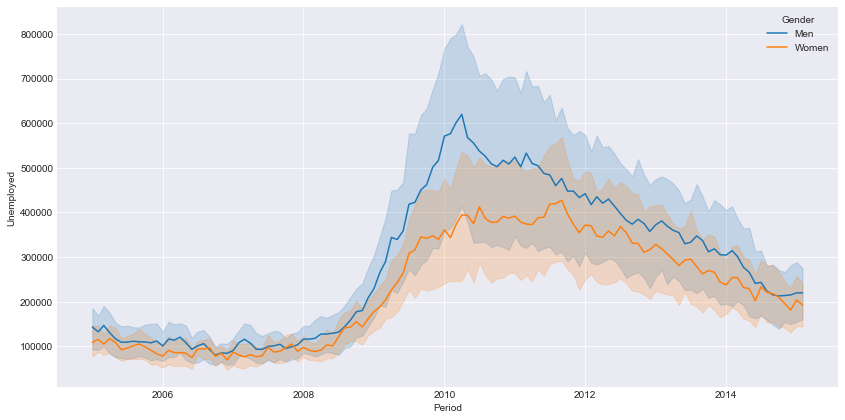

In [16]:
"""
    Grouping the data by using a specified column , hue = column_name
"""
plt.figure(figsize=(14,7))
plt.style.use("seaborn-darkgrid")
sns.lineplot(x="Period",y="Unemployed",hue="Gender",data=unemployment_data)
plt.show()

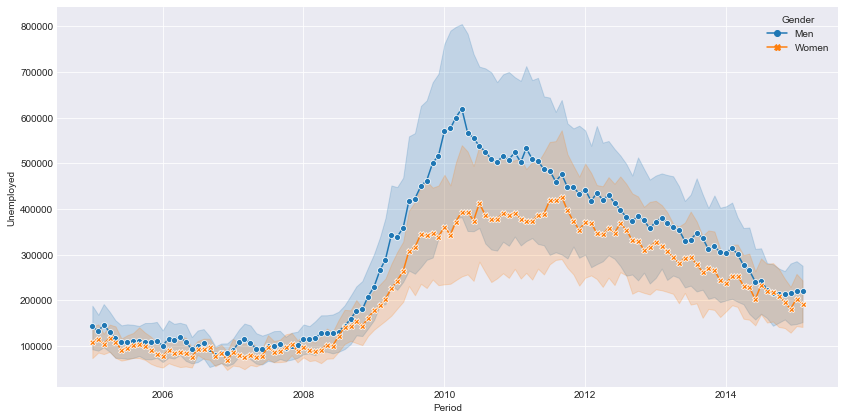

In [17]:
"""
    Grouping the data and marking it by differnt chars , style = column_name and markers=True
"""

plt.figure(figsize=(14,7))
plt.style.use("seaborn-darkgrid")
sns.lineplot(x="Period",y="Unemployed",hue="Gender",style="Gender",markers=True,dashes=False,data=unemployment_data)
plt.show()

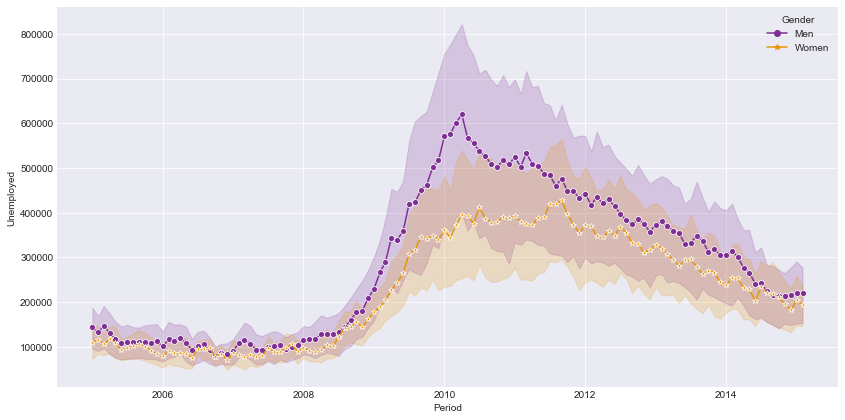

In [18]:
"""
    Grouping the data and marking the data by using custom markers , markers = Arraylist
"""
plt.figure(figsize=(14,7))
plt.style.use("seaborn-darkgrid")
sns.lineplot(x="Period",y="Unemployed",hue="Gender",style="Gender",markers=["o","*"],dashes=False,palette='CMRmap',data=unemployment_data)
plt.show()

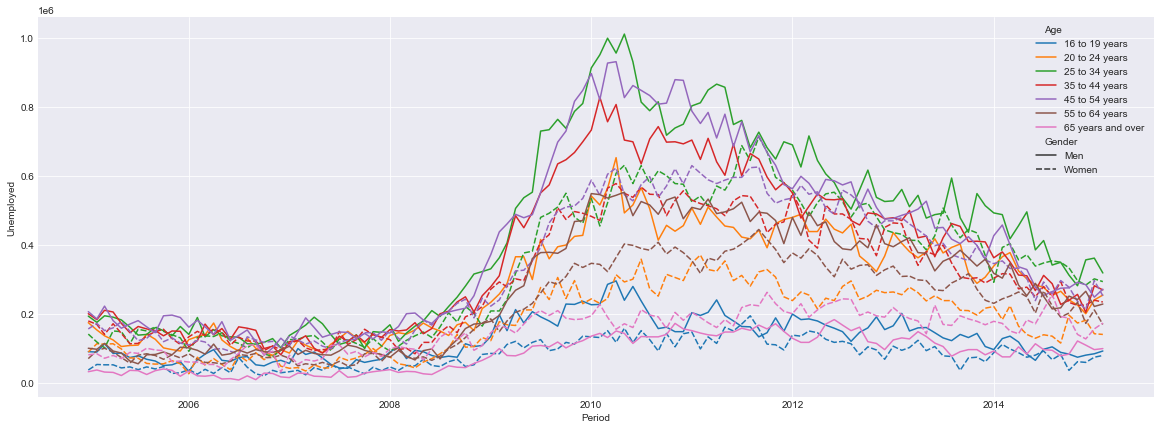

In [20]:
"""
    Grouping the data by Age and Gender
    Gender(2 categories) - Male and Female
    Age(7 categories) - '16 to 19 years', '20 to 24 years', '25 to 34 years', '35 to 44 years',
       '45 to 54 years', '55 to 64 years', '65 years and over'
    2*7 = 14 line plots
"""
plt.figure(figsize=(20,7))
sns.lineplot(x="Period",y="Unemployed",data=unemployment_data
            ,hue="Age",style="Gender")
plt.show()

In [21]:
emp = unemployment_data[unemployment_data['Period'].between('2005-01-01','2006-01-01',inclusive=True)]
emp.tail()

Age Gender     Period  Unemployed
177     25 to 34 years  Women 2006-01-01       92000
178     35 to 44 years  Women 2006-01-01      134000
179     45 to 54 years  Women 2006-01-01      110000
180     55 to 64 years  Women 2006-01-01       85000
181  65 years and over  Women 2006-01-01       61000

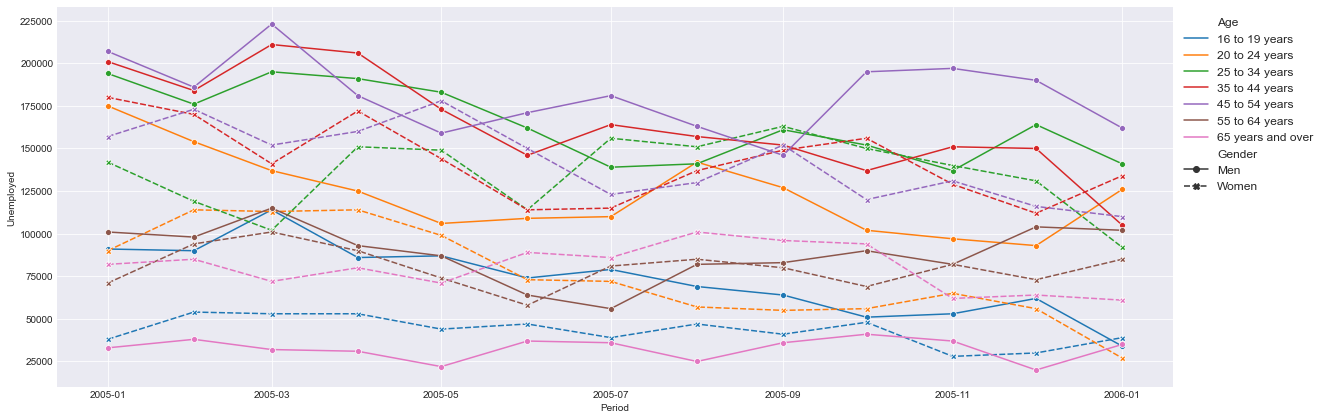

In [22]:
"""
    Instead of Aggerating the data , displaying values of all the age and gender in the data by using units attribute
"""
plt.figure(figsize=(20,7))
sns.lineplot(x="Period",y="Unemployed",data=emp,
            hue="Age",style="Gender",units="Gender",markers=True,estimator=None)
plt.legend(bbox_to_anchor=(1.0,1.0),fontsize='large') # used to place the legend outside of the plot
plt.show()

## Relplot

<Figure size 1440x504 with 0 Axes>

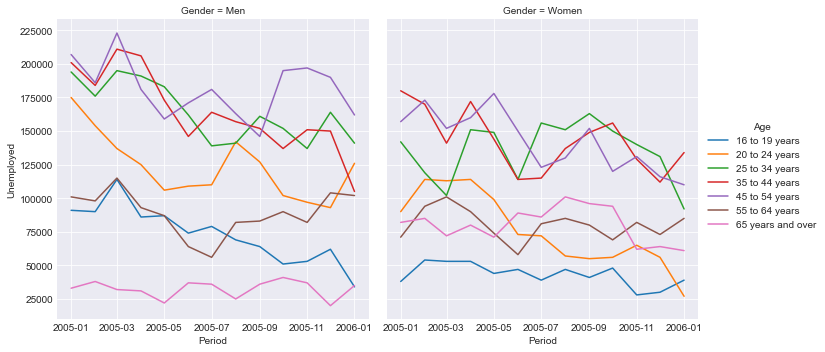

In [23]:
"""
    Spliting the plots by Gender column
"""
plt.figure(figsize=(20,7))
sns.relplot(x="Period",y="Unemployed",data=emp,
            hue="Age",col="Gender",kind="line")
plt.show()

<Figure size 720x504 with 0 Axes>

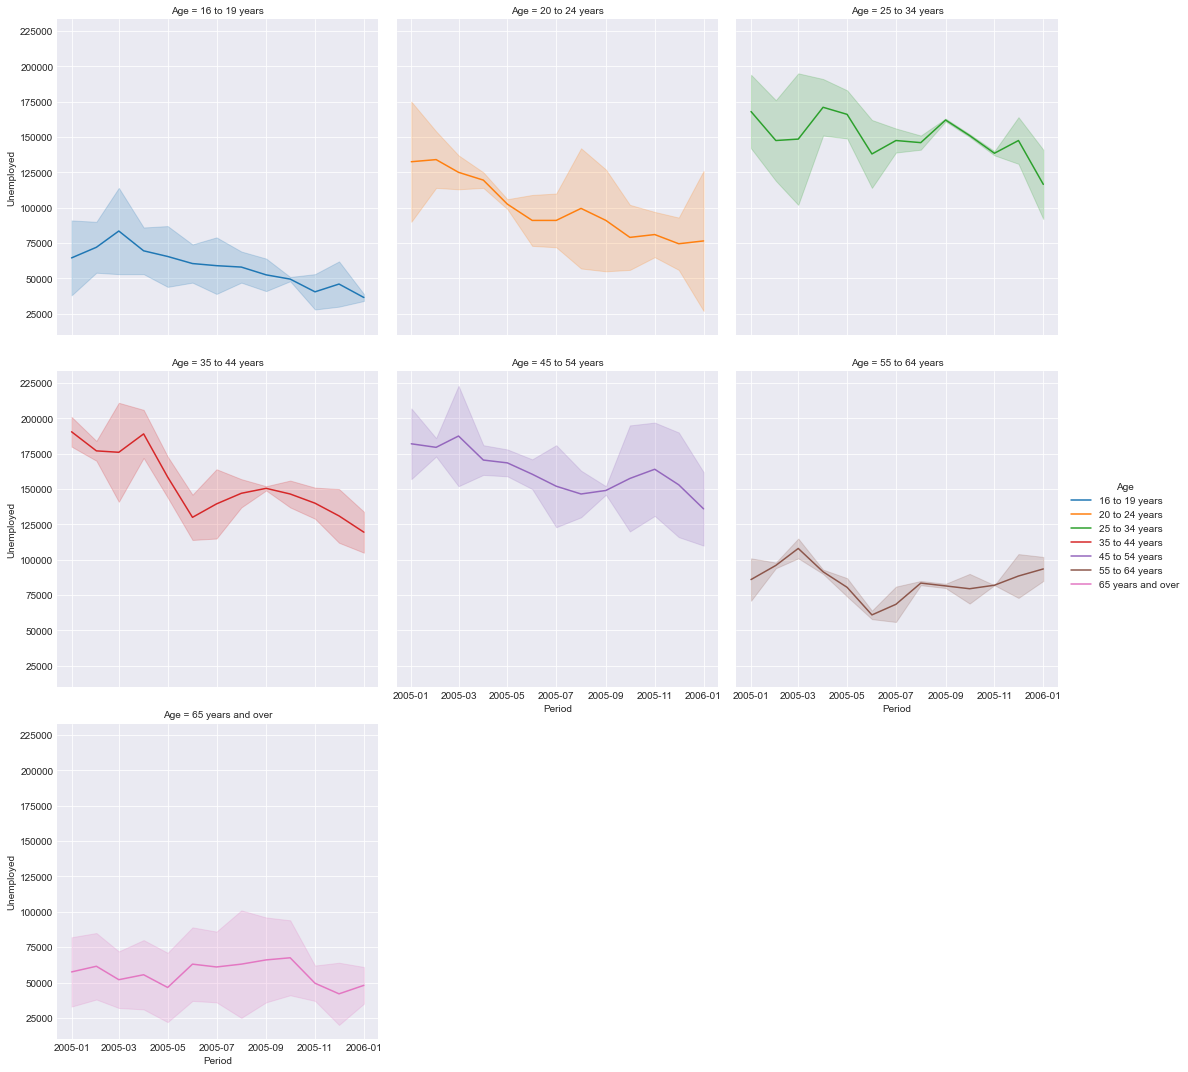

In [24]:
"""
    Plotting lineplots by column(Age) with 3 columns(col_wrap)
    col_wrap - will be applicable only when using col attribute
"""
plt.figure(figsize=(10,7))
sns.relplot(x="Period",y="Unemployed",col="Age",data=emp,hue='Age',kind='line',col_wrap=3)
plt.show()

<Figure size 720x504 with 0 Axes>

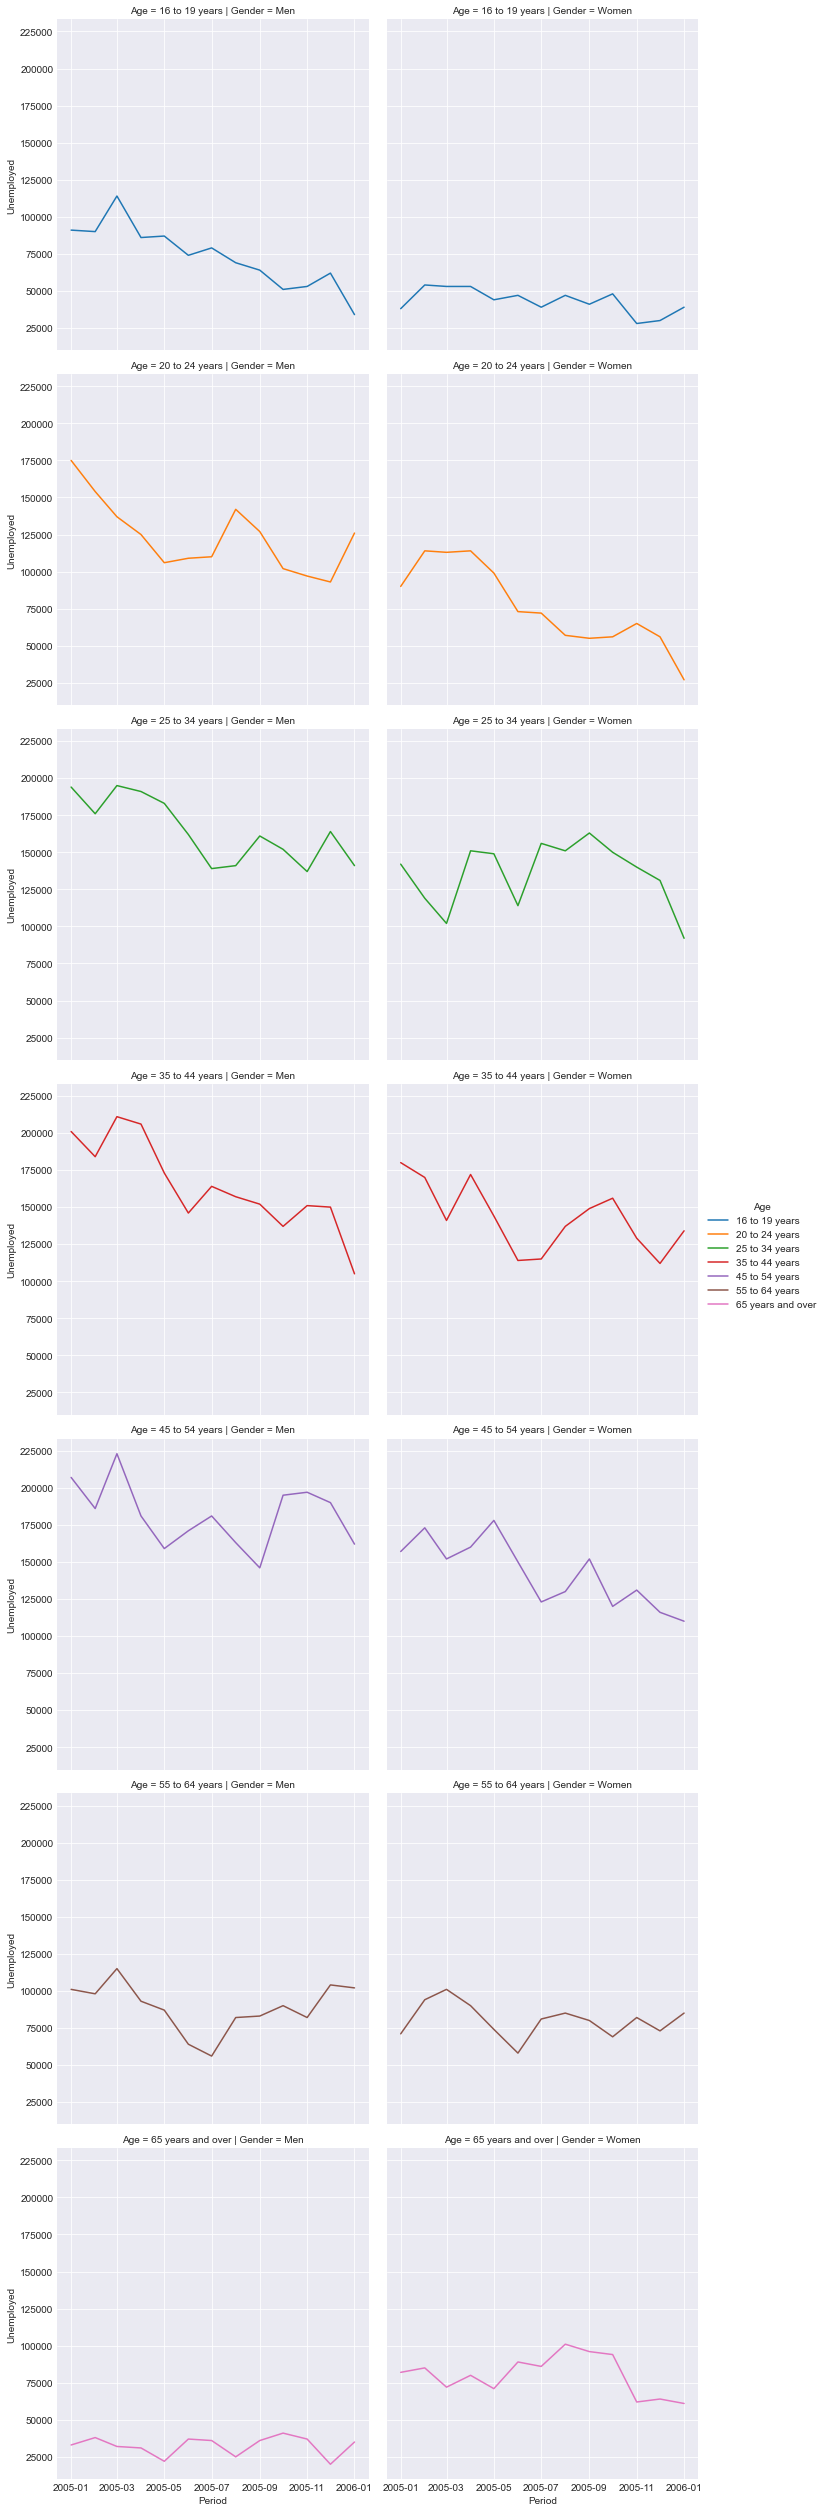

In [25]:
"""
    Plotting lineplots by Row(Age) and column(Gender)
"""
plt.figure(figsize=(10,7))
sns.relplot(x="Period",y="Unemployed",col="Gender",row="Age",data=emp,hue='Age',kind='line')

In [26]:
#Restoring to default
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

## Scatterplot

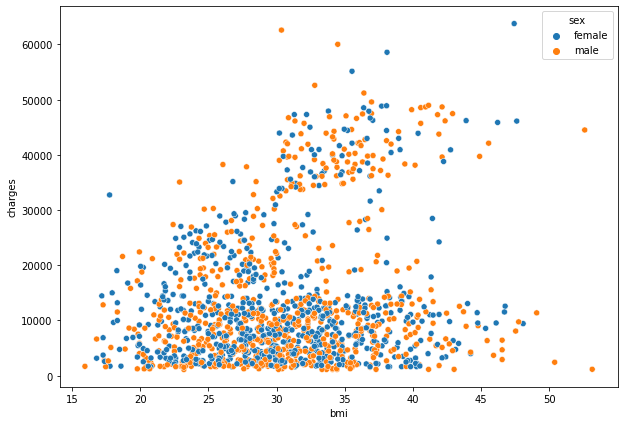

In [27]:
"""
    Grouping data by Sex in the scatter plot
"""
plt.figure(figsize=(10,7))
sns.scatterplot(x=insurance_data.bmi,y=insurance_data.charges,hue=insurance_data.sex)
plt.show()

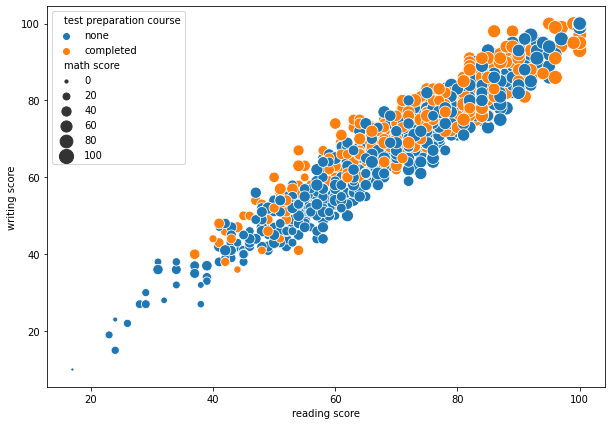

In [28]:
"""
    Changing the size of the value by Math score - ranges b/w 10 to 200 
"""
plt.figure(figsize=(10,7))
sns.scatterplot(x=student_data['reading score'],y=student_data['writing score'],hue=student_data['test preparation course'],size=student_data['math score'],sizes=(10,200))
plt.show()

<Figure size 720x504 with 0 Axes>

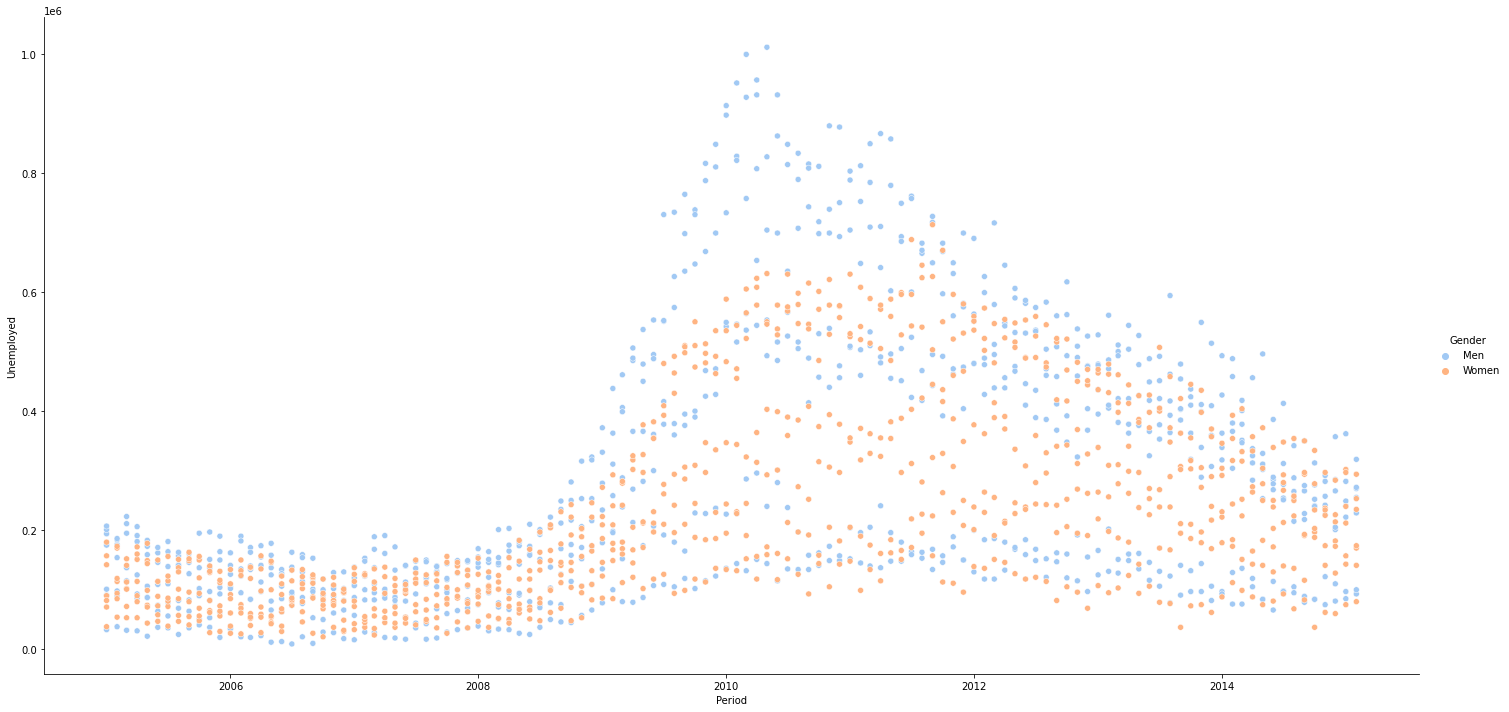

In [29]:
## Relplot for Scatter plot
plt.figure(figsize=(10,7))
sns.relplot(palette="pastel",x=unemployment_data['Period'],y=unemployment_data['Unemployed'],hue=unemployment_data["Gender"],height=10,aspect=2)
plt.show()

In [30]:
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

## Barplot

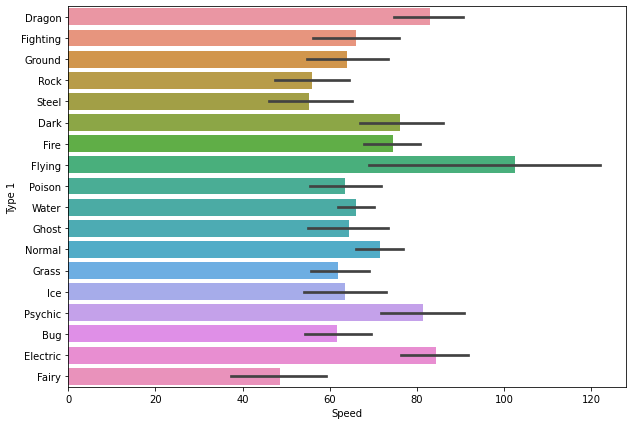

In [31]:
"""
    Plotting the bar plot, Ordering values by Type 1 column sorting by Attack column
"""
# Dragons are the best attackers
# Flying types are having high speed
plt.figure(figsize=(10,7))
sns.barplot(x=pokemon_data['Speed'],y=pokemon_data['Type 1'],order=pokemon_data.groupby(['Type 1']).mean().sort_values('Attack',ascending=False).index.values)
plt.show()

In [32]:
pokemon_data.groupby(['Type 1']).mean().sort_values('Defense',ascending=False)

#         HP      Attack     Defense    Sp. Atk    Sp. Def  \
Type 1                                                                          
Steel     442.851852  65.222222   92.703704  126.370370  67.518519  80.629630   
Rock      392.727273  65.363636   92.863636  100.795455  63.340909  75.477273   
Dragon    474.375000  83.312500  112.125000   86.375000  96.843750  88.843750   
Ground    356.281250  73.781250   95.750000   84.843750  56.468750  62.750000   
Ghost     486.500000  64.437500   73.781250   81.187500  79.343750  76.468750   
Water     303.089286  72.062500   74.151786   72.946429  74.812500  70.517857   
Ice       423.541667  72.000000   72.750000   71.416667  77.541667  76.291667   
Grass     344.871429  67.271429   73.214286   70.800000  77.500000  70.428571   
Bug       334.492754  56.884058   70.971014   70.724638  53.869565  64.797101   
Dark      461.354839  66.806452   88.387097   70.225806  74.645161  69.516129   
Poison    251.785714  67.250000   74.678571   68.821429  60.428571  64.392857   
Fire      327.403846  69.903846   84.769231   67.769231  88.980769  72.211538   
Psychic   380.807018  70.631579   71.456140   67.684211  98.403509  86.280702   
Electric  363.500000  59.795455   69.090909   66.295455  90.022727  73.704545   
Flying    677.750000  70.750000   78.750000   66.250000  94.250000  72.500000   
Fighting  363.851852  69.851852   96.777778   65.925926  53.111111  64.703704   
Fairy     449.529412  74.117647   61.529412   65.705882  78.529412  84.705882   
Normal    319.173469  77.275510   73.469388   59.846939  55.816327  63.724490   

               Speed  Generation  Legendary       Total  
Type 1                                                   
Steel      55.259259    3.851852   0.148148  487.703704  
Rock       55.909091    3.454545   0.090909  453.750000  
Dragon     83.031250    3.875000   0.375000  550.531250  
Ground     63.906250    3.156250   0.125000  437.500000  
Ghost      64.343750    4.187500   0.062500  439.562500  
Water      65.964286    2.857143   0.035714  430.455357  
Ice        63.458333    3.541667   0.083333  433.458333  
Grass      61.928571    3.357143   0.042857  421.142857  
Bug        61.681159    3.217391   0.000000  378.927536  
Dark       76.161290    4.032258   0.064516  445.741935  
Poison     63.571429    2.535714   0.000000  399.142857  
Fire       74.442308    3.211538   0.096154  458.076923  
Psychic    81.491228    3.385965   0.245614  475.947368  
Electric   84.500000    3.272727   0.090909  443.409091  
Flying    102.500000    5.500000   0.500000  485.000000  
Fighting   66.074074    3.370370   0.000000  416.444444  
Fairy      48.588235    4.117647   0.058824  413.176471  
Normal     71.551020    3.051020   0.020408  401.683673

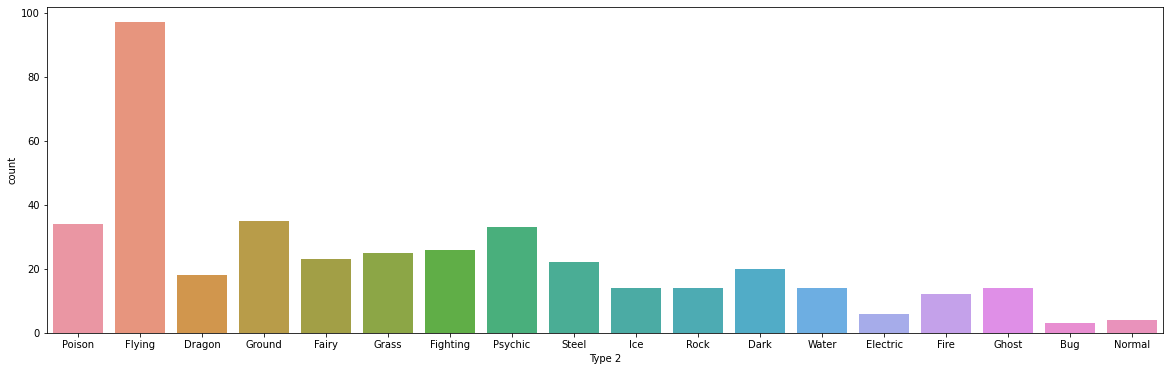

In [33]:
"""
   Number of Type 2 pokemon
"""
# Flying pokemon are having the highest count
plt.figure(figsize=(20,6))
sns.countplot(x=pokemon_data["Type 2"])
plt.show()

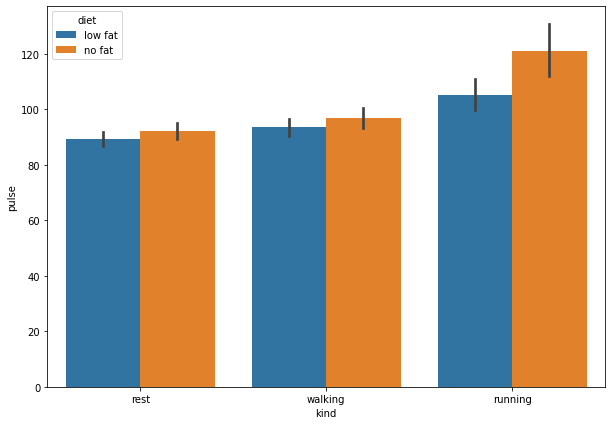

In [34]:
"""
    Show groups with different values by using hue
"""
plt.figure(figsize=(10,7))
sns.barplot(x=exercise_data.kind,y=exercise_data.pulse,hue=exercise_data.diet)
plt.show()

## Catplot

This plot used to plot between numerical and one or more categorical data,We can use this plot for serveral representations. kind = can be any of the following strip,swarm, box,boxen,violin, point, bar, count

<Figure size 720x504 with 0 Axes>

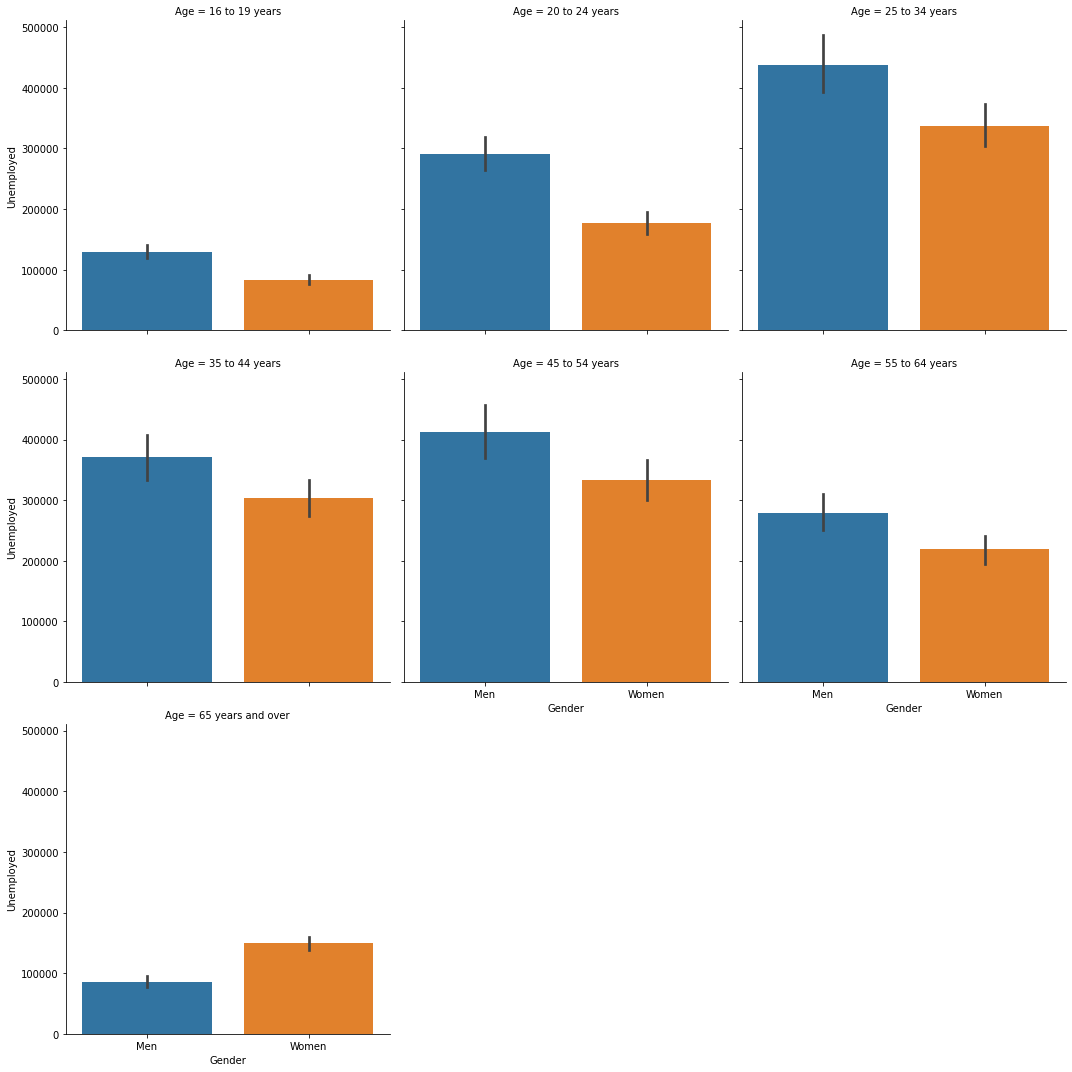

In [35]:
"""
    Using bar plot to visualize data
"""
plt.figure(figsize=(10,7))
sns.catplot(x="Gender",y="Unemployed",col="Age",col_wrap=3,data=unemployment_data,kind="bar")
plt.show()

<Figure size 504x720 with 0 Axes>

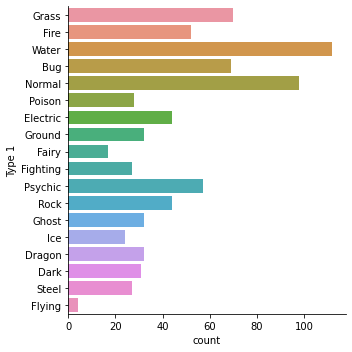

In [36]:
"""
    Using count plot to visualize data
"""
plt.figure(figsize=(7,10))
sns.catplot(data=pokemon_data, y="Type 1",kind="count")
plt.show()

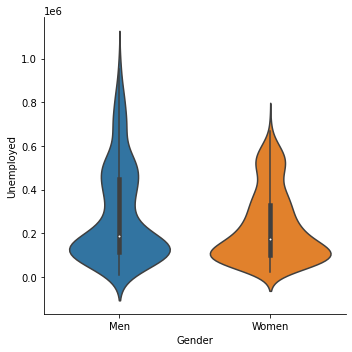

In [37]:
"""
    Using violin plot to visualize data
"""
sns.catplot(x="Gender",y="Unemployed",data=unemployment_data
            ,kind="violin")
plt.show()

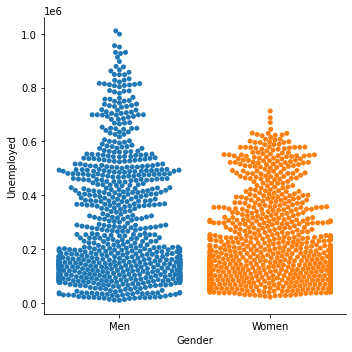

In [38]:
"""
    Using swarm plot to visualize data
"""
sns.catplot(x="Gender",y="Unemployed",data=unemployment_data
            ,kind="swarm")

plt.show()

In [39]:
# Recover default matplotlib settings
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

## Displot

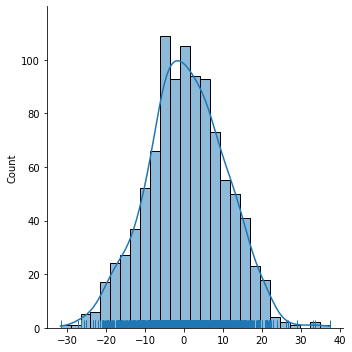

In [40]:
"""
    plotting Distrubtion of the data with kde and rug
    rug = showing each distribution with marginal ticks
"""
num = np.random.normal(1,10,1000)
sns.displot(num,kde=True,rug=True)
plt.show()

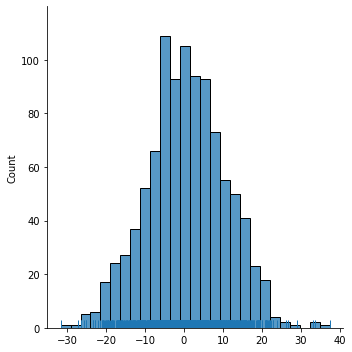

In [41]:
"""
    plotting Distrubtion of the data with rug and without kde
"""
sns.displot(num,rug=True)
plt.show()

## Kdeplot

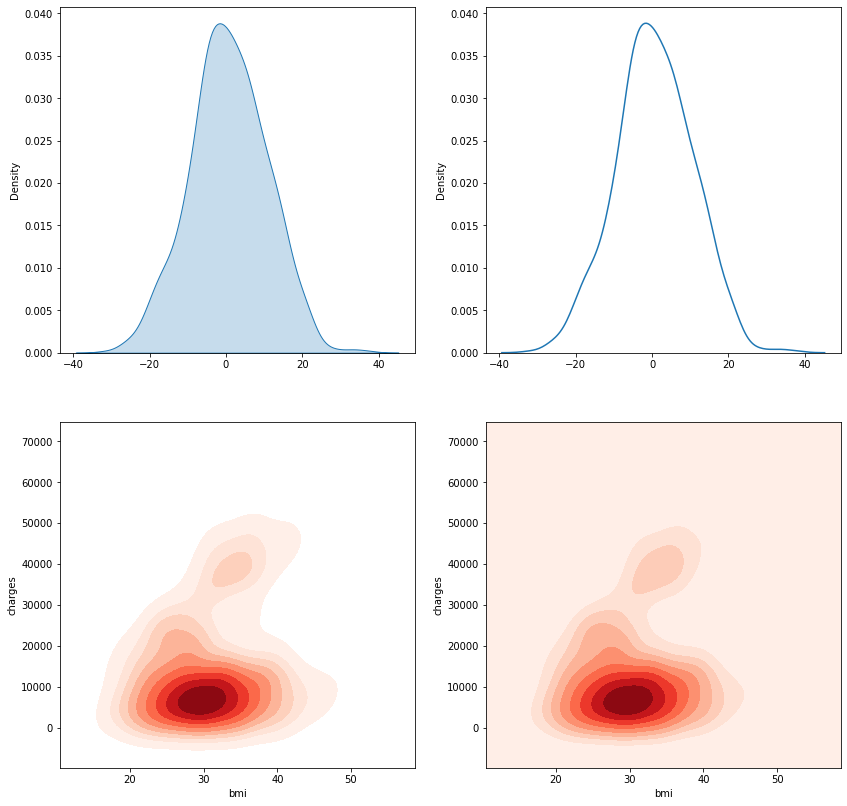

In [42]:
"""
    1st plot = kde plot with shade 
    2nd plot = kde without shades
    3rd plot = kde with x and y - hiding lowest values from plot
    4th plot = same as 3, but with shading lowest values
"""
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(14,14))
sns.kdeplot(num,shade=True,ax=axes[0,0])
sns.kdeplot(num,ax=axes[0,1])
sns.kdeplot(insurance_data.bmi,insurance_data.charges,shade=True,cmap="Reds",shade_lowest=False,ax=axes[1,0])
sns.kdeplot(insurance_data.bmi,insurance_data.charges,shade=True,cmap="Reds",shade_lowest=True,ax=axes[1,1])
plt.show()

## Swarmplot

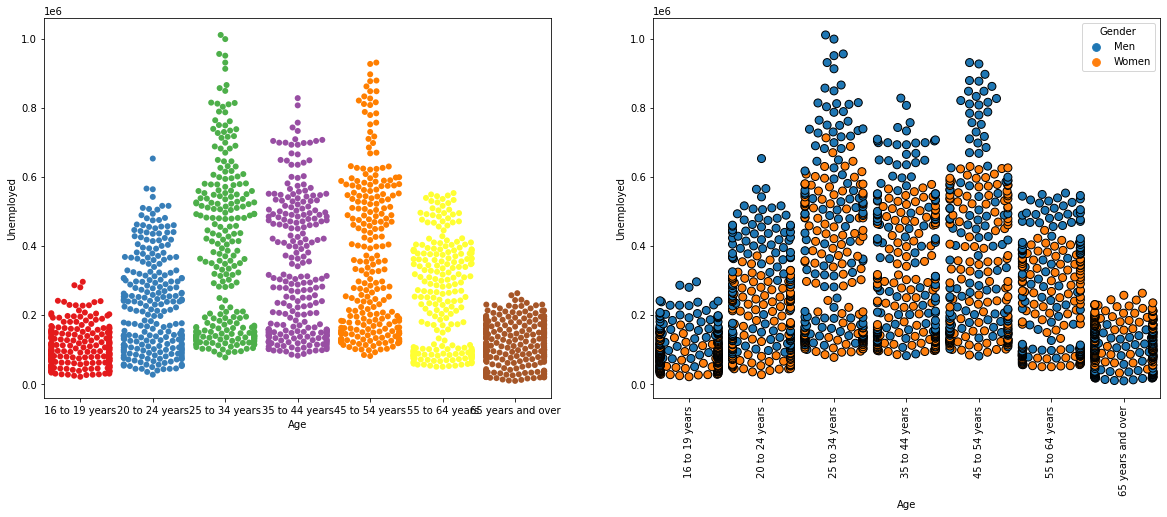

In [43]:
"""
    1st plot = swarm plot of x and y , with size of value as 6
    2nd plot = swarm plot of Age and Unemployed, grouped by Gender - with edge color as black
"""
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(20,7))
sns.swarmplot(x=unemployment_data.Age,y=unemployment_data.Unemployed,palette="Set1",size=6,ax=axes[0])

sns.swarmplot(x=unemployment_data.Age,y=unemployment_data.Unemployed,ax=axes[1],
                hue=unemployment_data.Gender,edgecolor="black",linewidth=1,size=8)
plt.xticks(rotation=90)
plt.show()


## Violin plot


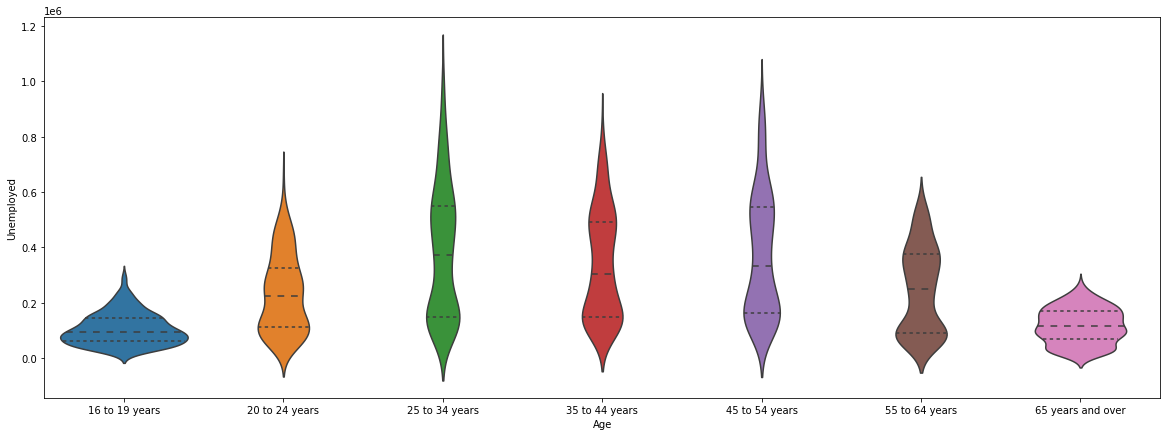

In [44]:
"""
    plotting violin plot with quartile of the data 
"""
plt.figure(figsize=(20,7))
sns.violinplot(x=unemployment_data['Age'],y=unemployment_data['Unemployed'],inner="quartile")
plt.show()

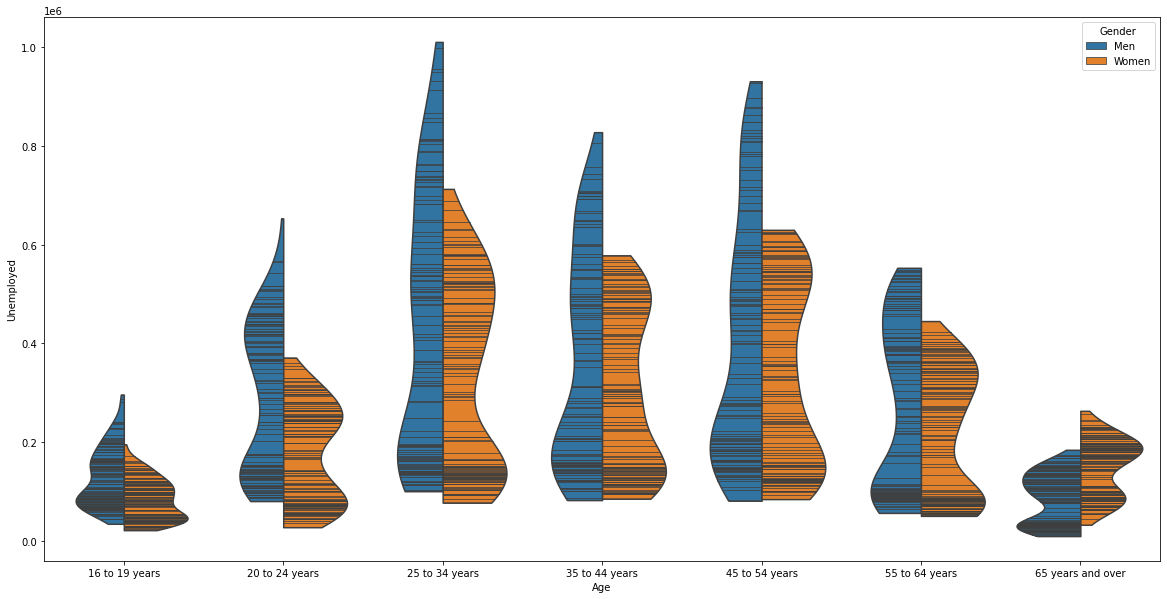

In [45]:
"""
    plotting violin plot with marking all entries of the data , grouped by Gender 
    split = True -> will be combine both gender into one for each age category
    cut = 0 -> will be start with max and min value of the category
"""
plt.figure(figsize=(20,10))
sns.violinplot(x=unemployment_data['Age'],y=unemployment_data['Unemployed'],hue=unemployment_data['Gender'],split=True,inner="stick",cut=0)
plt.show()

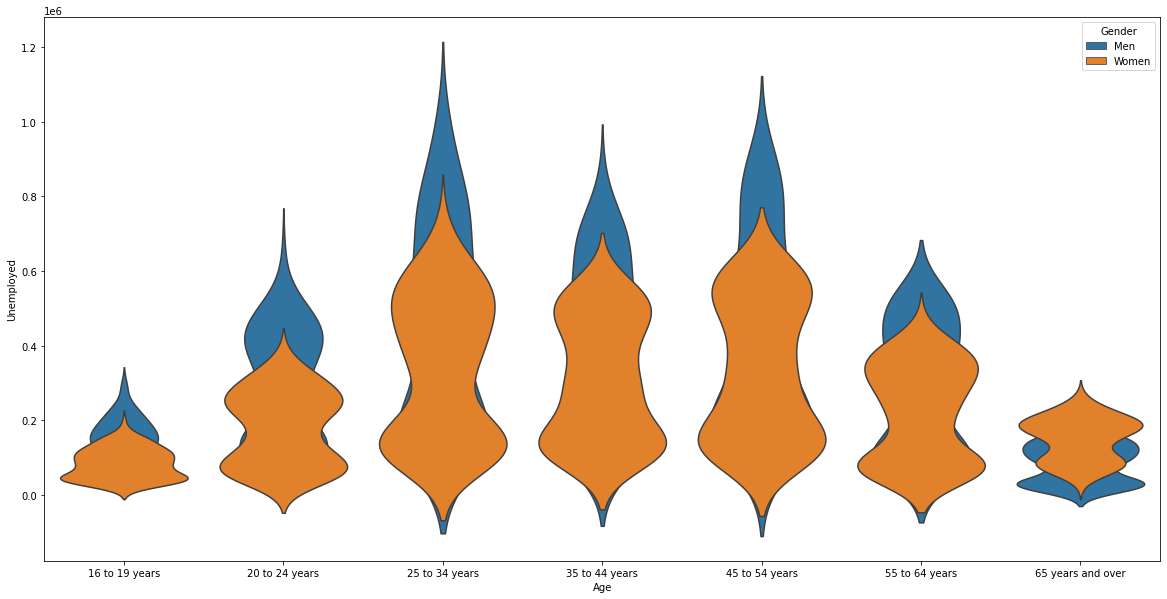

In [46]:
"""
    plotting violin plot with all entries of the data , grouped by Gender 
    dodge = False -> grouped category will be placed on one another    
"""
plt.figure(figsize=(20,10))
sns.violinplot(x=unemployment_data['Age'],y=unemployment_data['Unemployed'],hue=unemployment_data['Gender'],split=False,dodge=False,inner=None)
plt.show()

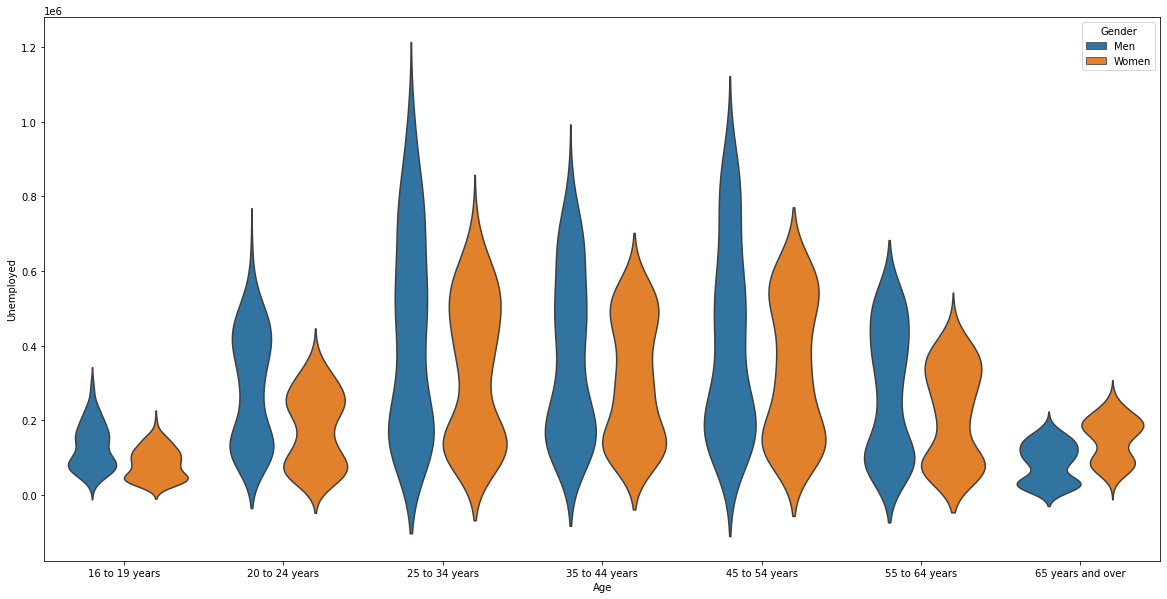

In [47]:
"""
    plotting violin plot with all entries of the data , grouped by Gender 
    dodge = True -> grouped category will be placed seperately   
"""
plt.figure(figsize=(20,10))
sns.violinplot(x=unemployment_data['Age'],y=unemployment_data['Unemployed'],hue=unemployment_data['Gender'],inner=None)
plt.show()

In [48]:
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline
sns.set_style("white")

## Stripplot

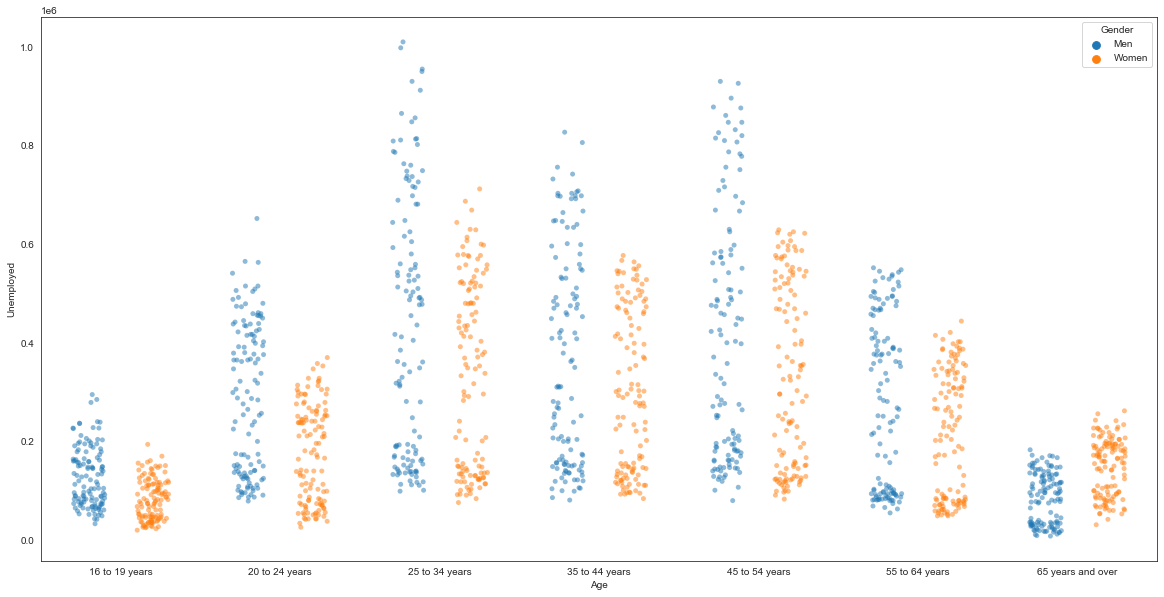

In [49]:
"""
    Stripplot is same as swarmplot, the data will be overlapped in the stripplot,
    whereas the data on the swarmplot will not be overlapped
    
    by using density of the data we can get insights of the distribution - stripplot
    by using width of the data we can more insights of the distribution - swarmplot
"""
#jitter will be used how far the data should be sperad for each category
# alpha = the density of the data, the more darker color means that distribution of the data is higher at that point
plt.figure(figsize=(20,10))
sns.stripplot(x=unemployment_data['Age'],y=unemployment_data['Unemployed'],hue=unemployment_data['Gender'],alpha=0.5,split=True,jitter=0.2)
plt.show()

## Boxplot

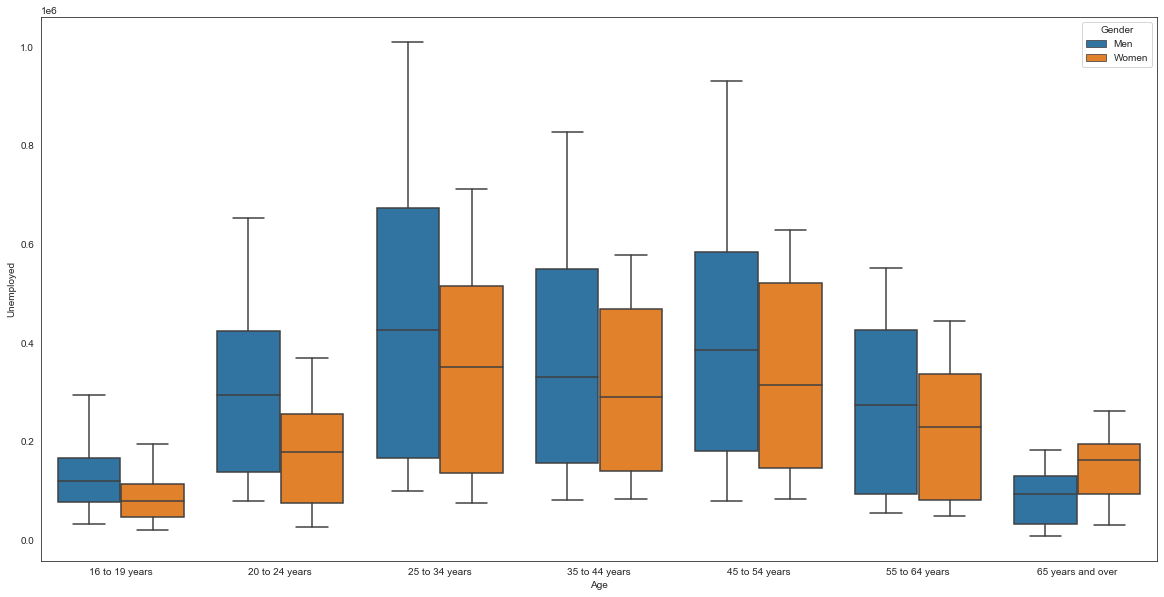

In [50]:
"""
    Plotting box plot for Age and Unemployed - this plot will provide data like min, first quartile, median, third quratile and max
    also it will used to find outlier in the data
"""
plt.figure(figsize=(20,10))
sns.boxplot(x=unemployment_data['Age'],y=unemployment_data['Unemployed'],hue=unemployment_data['Gender'],fliersize=15) # filersize for outlier data size
plt.show()

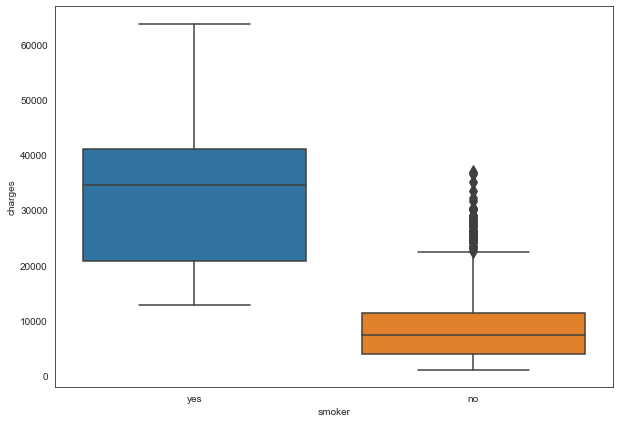

In [51]:
"""
    Plotting box plot to find outlier in the data
    in the below plot we can see that at end of smoker_no tail, there are outlier that highlighted in the black  color
"""
plt.figure(figsize=(10,7))
sns.boxplot(x=insurance_data.smoker , y= insurance_data.charges,fliersize=10) # filersize for outlier data size
plt.show()

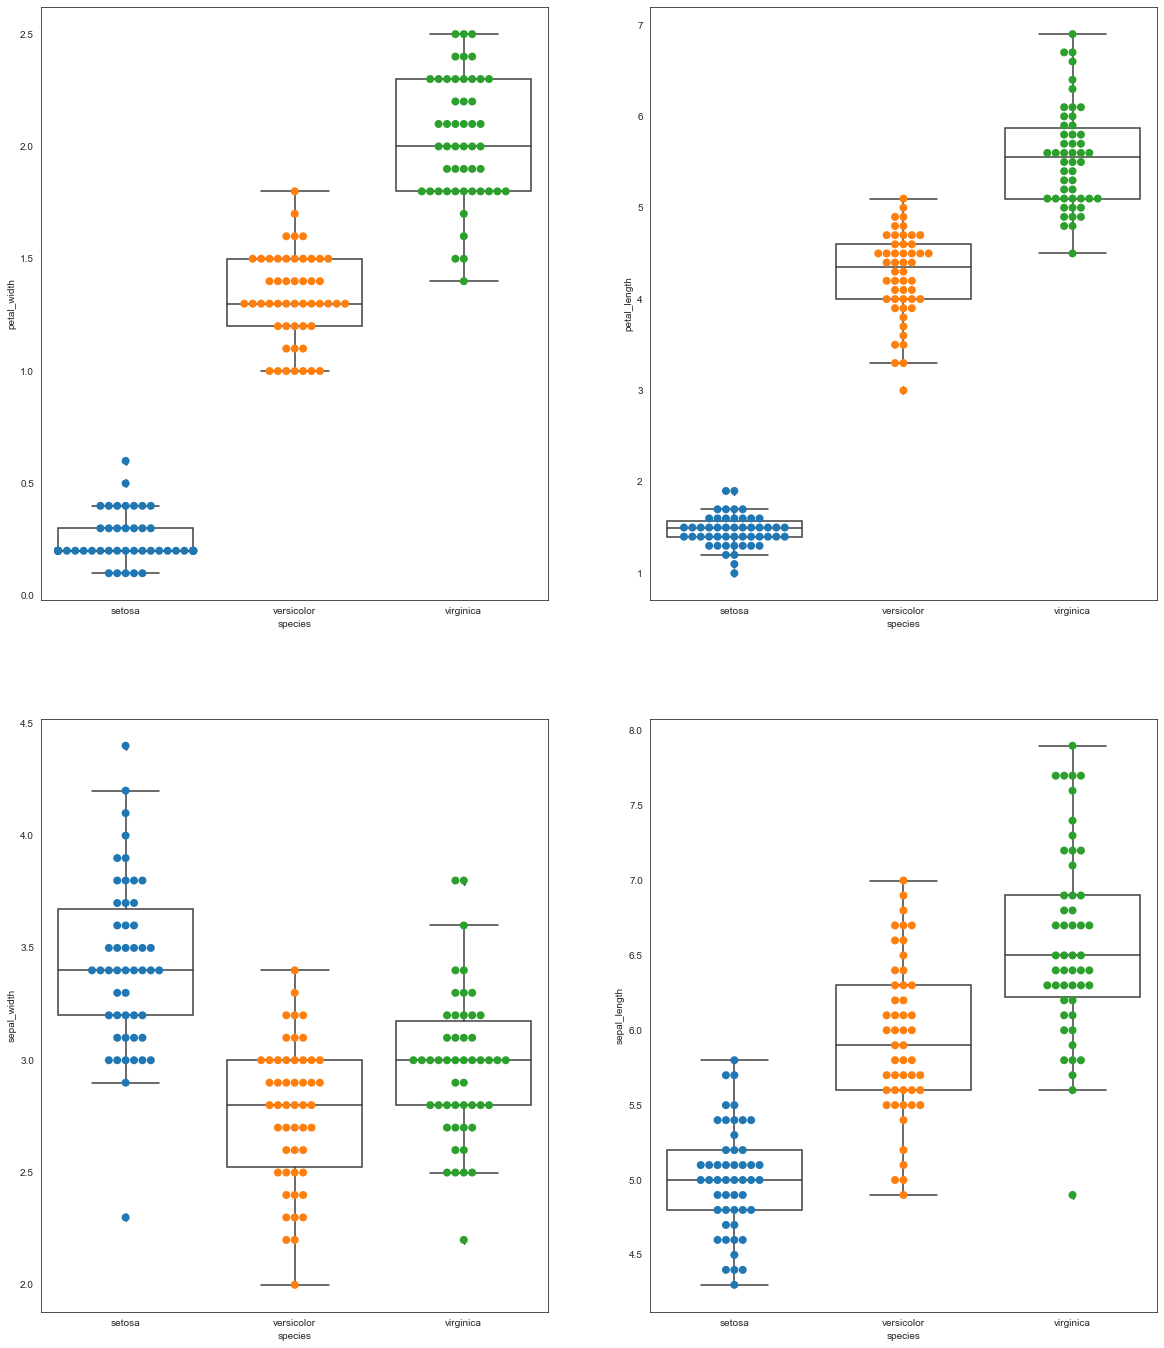

In [52]:
# Combining swarm and box plot 
fig1 , axes = plt.subplots(nrows=2,ncols=2 , figsize = (20,24))
sns.swarmplot(x="species" , y = "petal_width" , ax = axes[0,0] ,data=iris_data, size=8,)
sns.boxplot(x="species" , y = "petal_width" , ax = axes[0,0] ,data=iris_data ,boxprops={'facecolor':'None'})
sns.swarmplot(x="species" , y = "petal_length" ,ax = axes[0,1] , data=iris_data  , size=8)
sns.boxplot(x="species" , y = "petal_length" ,ax = axes[0,1] , data=iris_data ,boxprops={'facecolor':'None'})
sns.swarmplot(x="species" , y = "sepal_width" , ax = axes[1,0] , data=iris_data ,  size=8)
sns.boxplot(x="species" , y = "sepal_width" , ax = axes[1,0] , data=iris_data ,boxprops={'facecolor':'None'})
sns.swarmplot(x="species" , y = "sepal_length" , ax = axes[1,1] , data=iris_data, size=8)
sns.boxplot(x="species" , y = "sepal_length" , ax = axes[1,1] , data=iris_data ,boxprops={'facecolor':'None'})
plt.show()

In [53]:
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

## Boxen plot

<AxesSubplot:xlabel='Unemployed'>

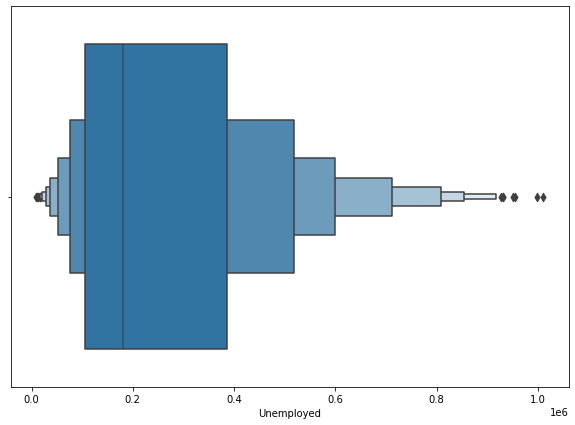

In [54]:
"""
     This is same like box plot, but this will provide more insights than box plot
     min, median, different levels of quartile, max, outliers
"""
plt.figure(figsize=(10,7))
sns.boxenplot(unemployment_data.Unemployed)

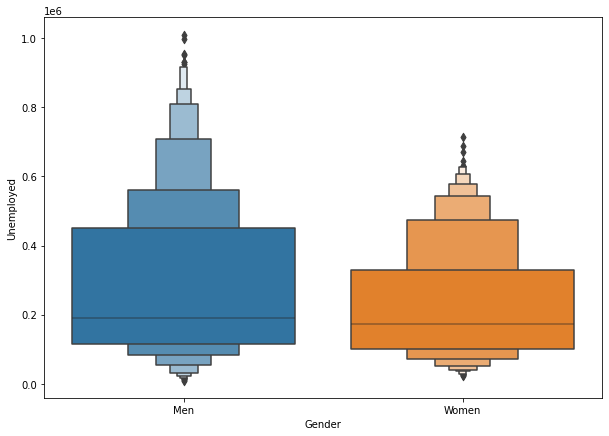

In [55]:
#plotting boxen plot for x and y
plt.figure(figsize=(10,7))
sns.boxenplot(x=unemployment_data.Gender,y=unemployment_data.Unemployed)
plt.show()

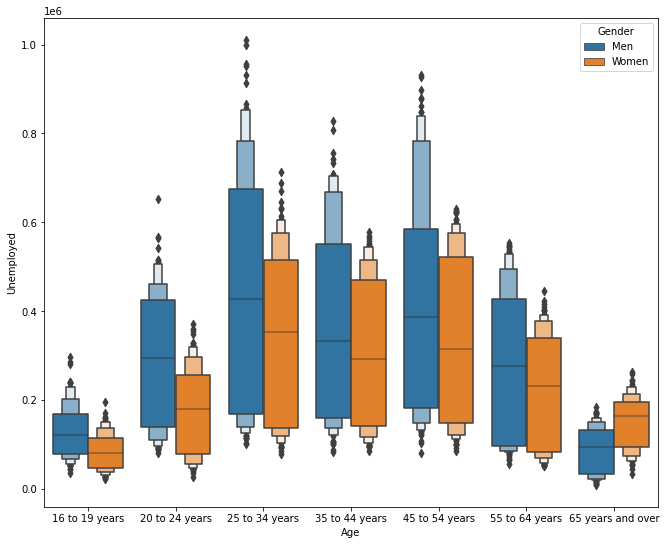

In [56]:
#grouping by Gender 
plt.figure(figsize=(11,9))
sns.boxenplot(x=unemployment_data.Age,y=unemployment_data.Unemployed,hue=unemployment_data.Gender)
plt.show()

<Figure size 720x1440 with 0 Axes>

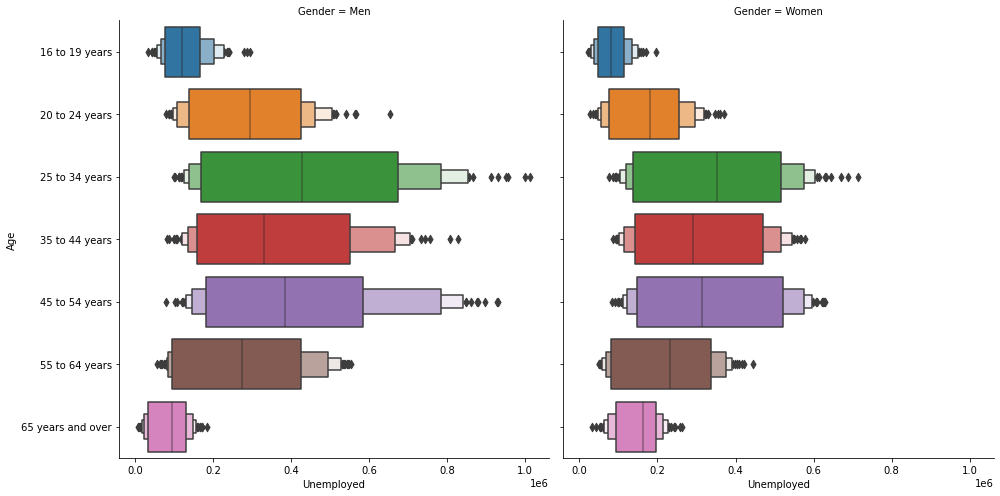

In [57]:
# Using catplot 
plt.figure(figsize=(10,20))
sns.catplot(x='Unemployed',y='Age',col='Gender',data=unemployment_data,kind='boxen',aspect=1.0,height=7)
plt.show()

In [58]:
# Recover default matplotlib settings
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

In [59]:
fish_data1 = fish_data[fish_data['Species'].isin(['Bream','Perch','Pike'])]
fish_data1.head()

Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340

## Pairplot

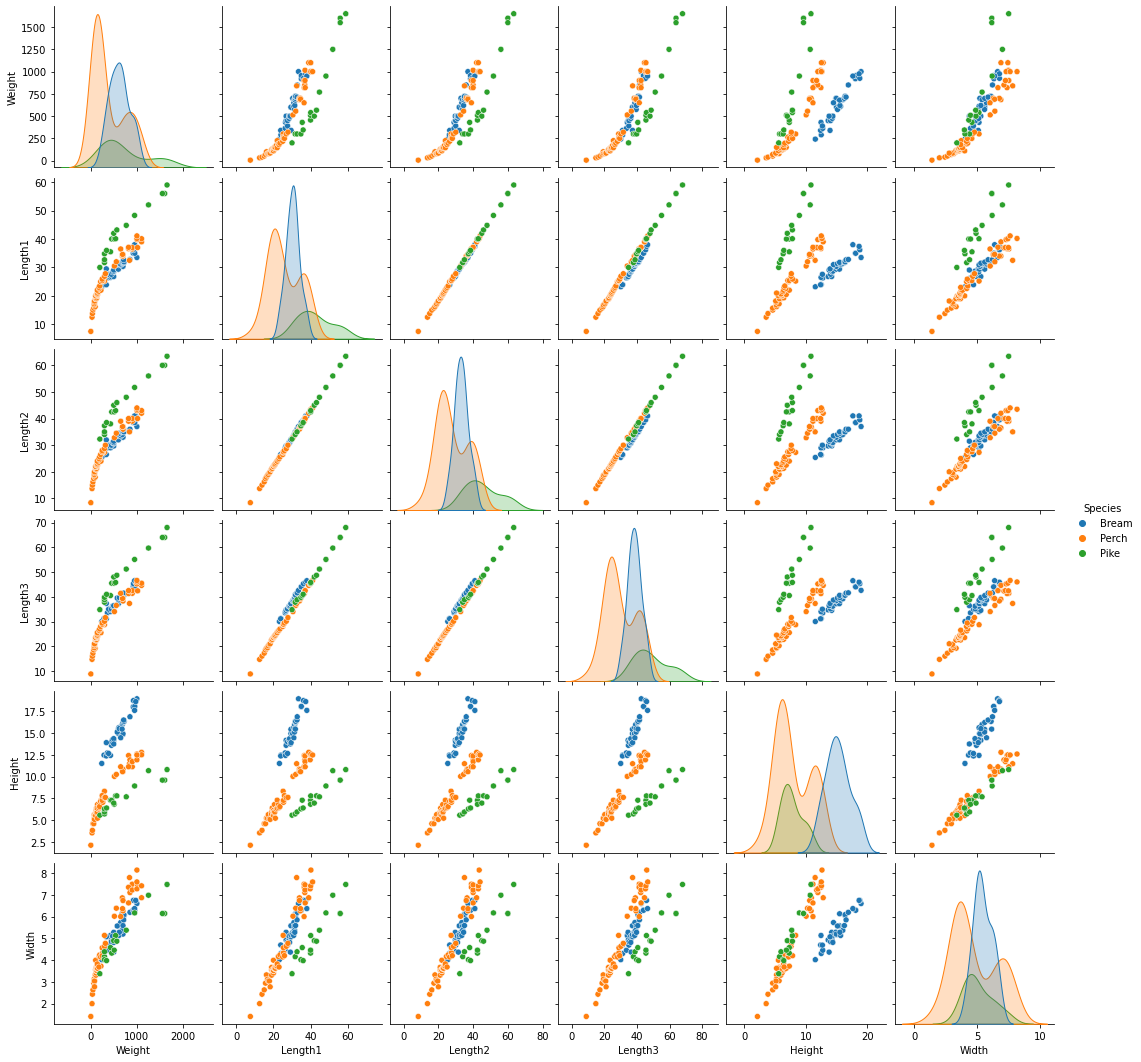

In [60]:
"""
    plotting histogram plot on the diagonal and scatter plot on the other. It will be very useful to check the relationship
    b/w other data
"""
sns.pairplot(fish_data1,hue="Species")
plt.show()

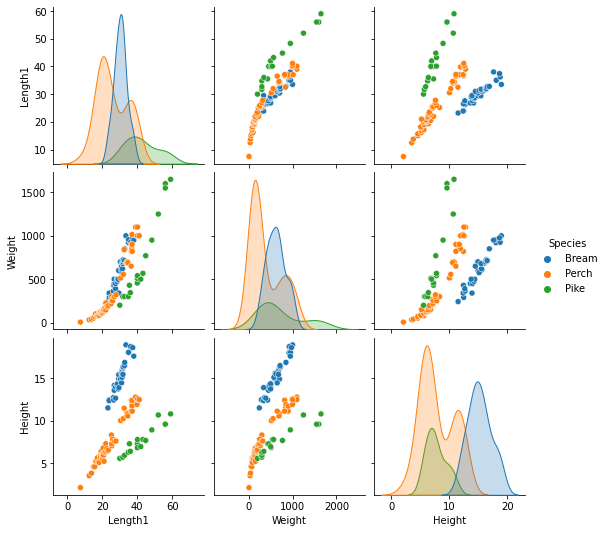

In [61]:
"""
    select the specified columns from the data for pairplot
"""
sns.pairplot(fish_data1,hue='Species',vars=['Length1','Weight','Height'])
plt.show()

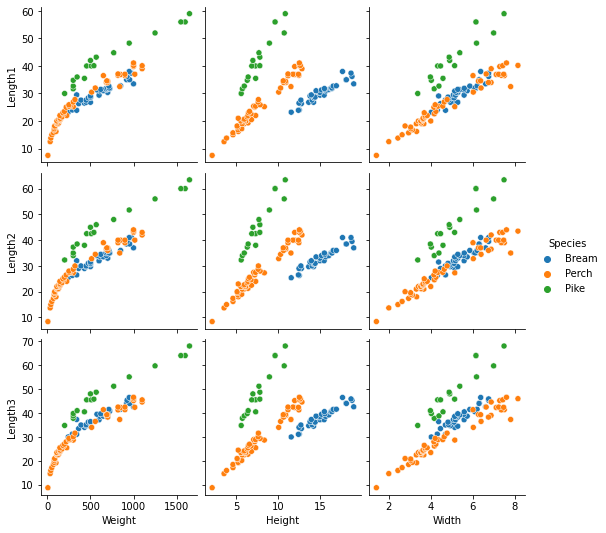

In [62]:
"""
    Selecting different columns for x and y to find out the relationship between data
"""
sns.pairplot(fish_data1,x_vars=['Weight','Height','Width'],y_vars=['Length1','Length2','Length3'],hue='Species')

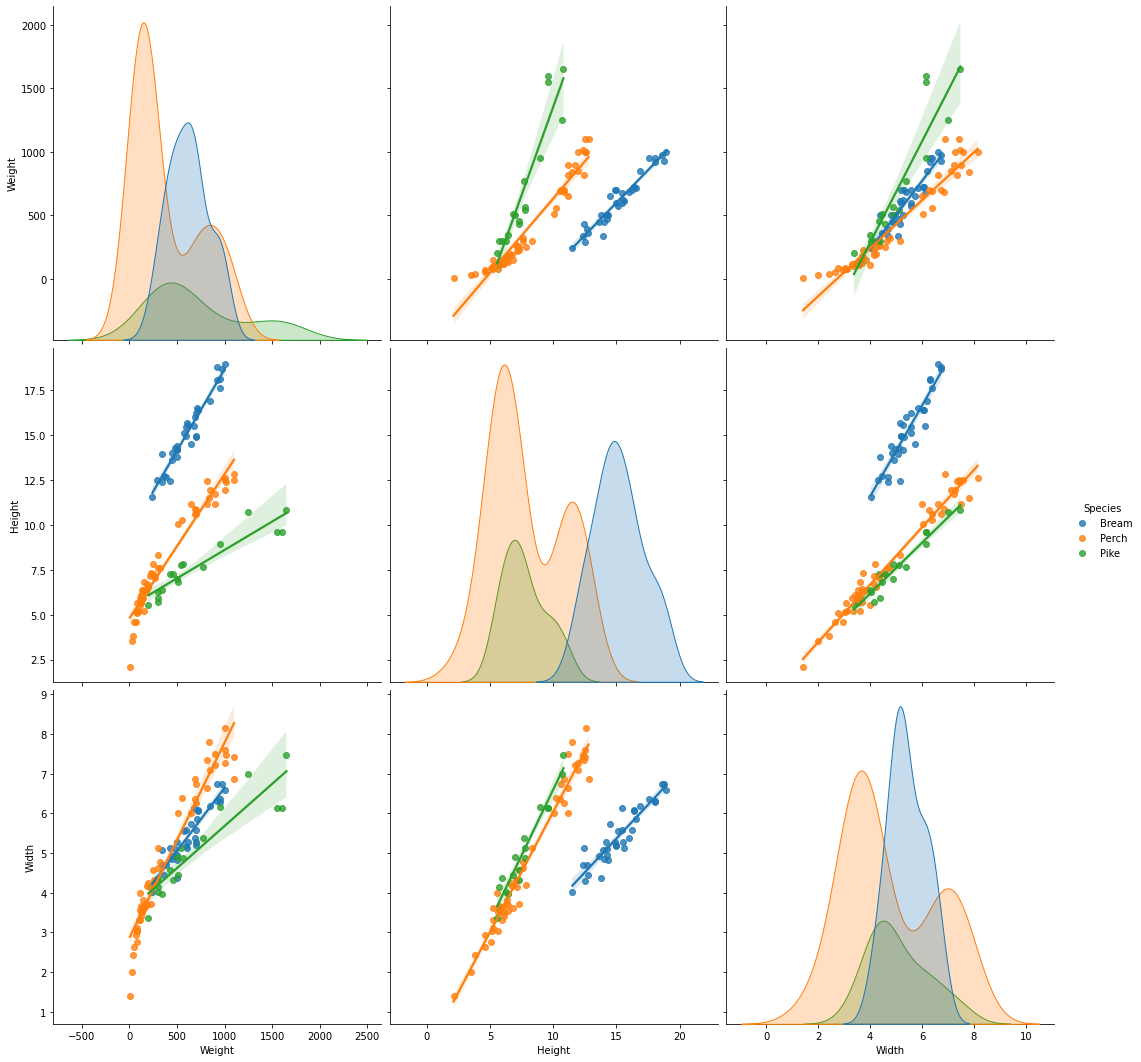

In [63]:
"""
    Applying linear regression on the pair plot 
"""
sns.pairplot(fish_data1,hue='Species',vars=['Weight','Height','Width'],kind='reg',height=5,aspect=1)
plt.show()

## Regplot

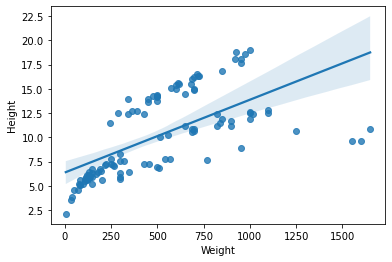

In [64]:
"""
    Plotting regplot on the two columns from the data, it will apply the linear regression on the data
    for polynomial regression use "order" parameter to select features
    robust regrssion - to ignore outlier - robust = True, 
    lowess = true for lowess regression 
    logx= True for logistic regression
    Note: any one of the above can use at a time
"""
sns.regplot(x=fish_data1.Weight,y=fish_data1.Height)
plt.show()

<AxesSubplot:xlabel='Weight', ylabel='Height'>

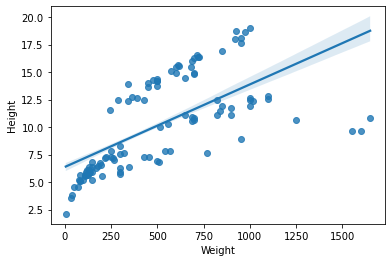

In [65]:
"""
    Reducing continous value to fit the data ci=50
"""
sns.regplot(x=fish_data1.Weight,y=fish_data1.Height,ci=50)

<AxesSubplot:xlabel='Weight', ylabel='Height'>

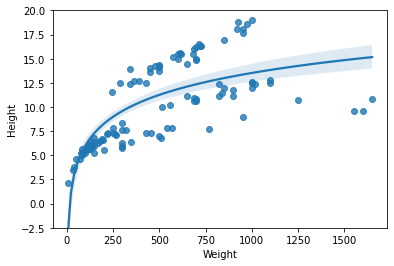

In [66]:
"""
    Applying logistic regression on the data
"""
plt.ylim(-2.5,20)
sns.regplot(x=fish_data1.Weight,y=fish_data1.Height,logx=True)

## lmplot

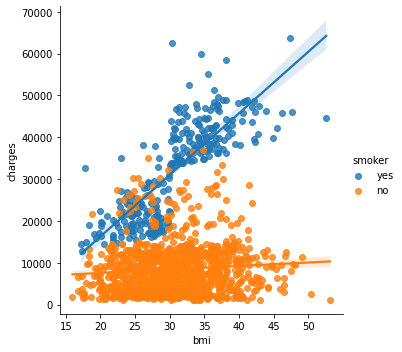

In [67]:
"""Plot data and regression model fits across a FacetGrid.
    for categorical variable
    scatter_kws - for customizing scatter styles
    line_kws - for customizing line style

"""
sns.lmplot(x="bmi",y="charges",hue="smoker",data=insurance_data)
plt.show()

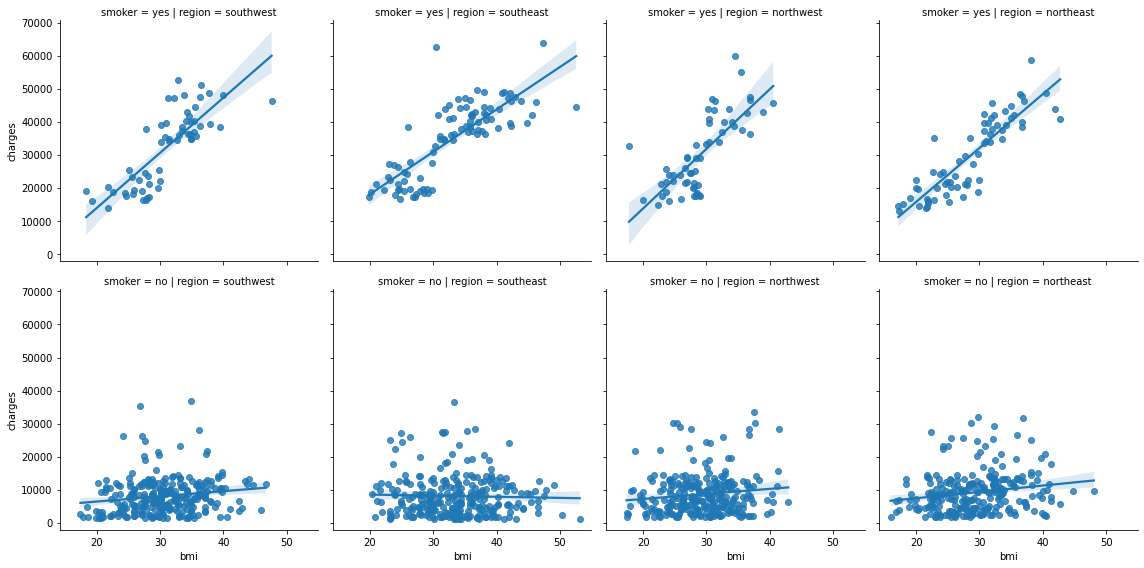

In [68]:
"""
    Regression plot with the facet grid
"""
sns.lmplot(x="bmi", y="charges", row="smoker", col="region", data=insurance_data ,height=4,aspect=1)
plt.show()

In [69]:
canada1 = canada_data.loc['2004': , ['Germany' , 'France' , 'Mexico' , 'Bangladesh' ,'Brazil','Israel' , 'Egypt' , 'Colombia' , 'Iraq','Jamaica']]
canada1.head()

Germany  France  Mexico  Bangladesh  Brazil  Israel  Egypt  Colombia  \
2004     2020    4391    2259        2660     917    2788   2393      4566   
2005     2226    4429    2837        4171     969    2446   2496      6424   
2006     2767    4002    2844        4014    1181    2625   2190      6535   
2007     2449    4290    3239        2897    1746    2401   2356      5357   
2008     3833    4532    2856        2939    2138    2562   3347      5452   

      Iraq  Jamaica  
2004  1796     2237  
2005  2226     1945  
2006  1788     1722  
2007  2406     2141  
2008  3543     2334

## Heatmap

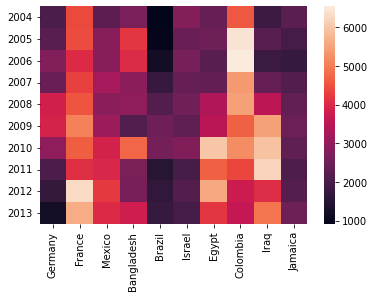

In [70]:
"""
    Heatmap is a representation of the magnitude in colors 
"""
sns.heatmap(canada1)
plt.show()

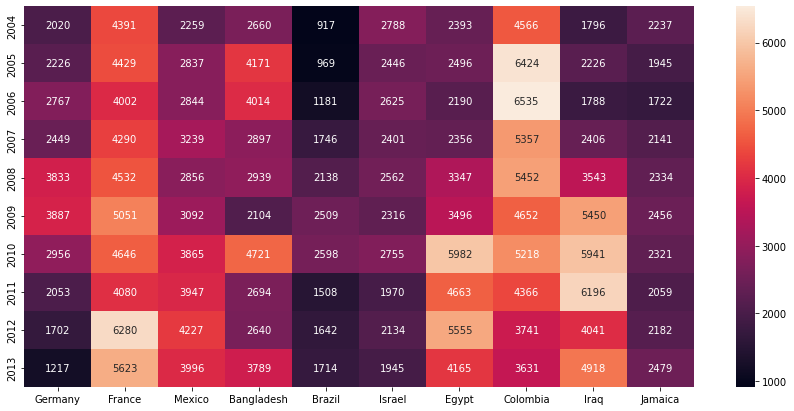

In [71]:
"""
    plotting heatmap 
    annot=True - will show text in the cell
    annot= True & fmt="d" - will display the integer in the cell (fmt='.2f' is for float)
    square= False - is for making all the boxes into same size
"""
plt.figure(figsize=(15,7))
sns.heatmap(canada1,annot=True,fmt='d',square=False)
plt.show()

In [72]:
# Recover default matplotlib settings
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

## Jointplot

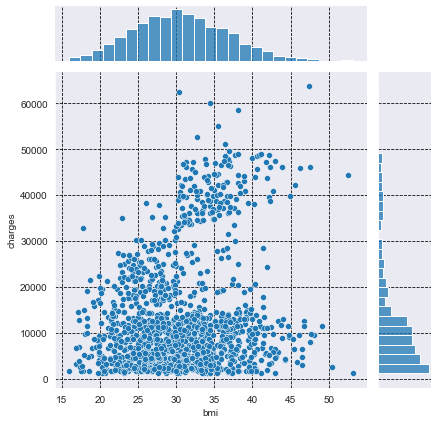

In [73]:
"""
    Jointplot is used to plot scatter and histogram plot on the marginals
"""
sns.set_style('darkgrid',{"grid.color": ".005", "grid.linestyle": "--"})
sns.jointplot(x='bmi',y='charges',data=insurance_data)
plt.show()

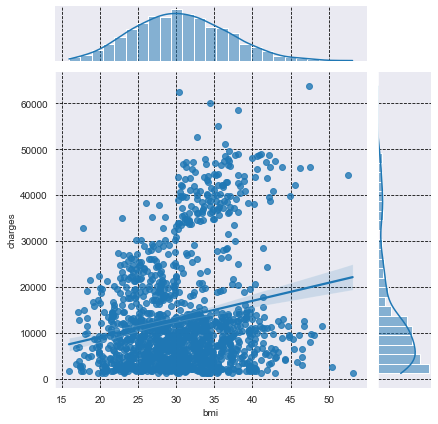

In [74]:
"""
    jointplot with regression plot on the scatter data
"""
sns.jointplot(x="bmi",y="charges",data=insurance_data,kind="reg")

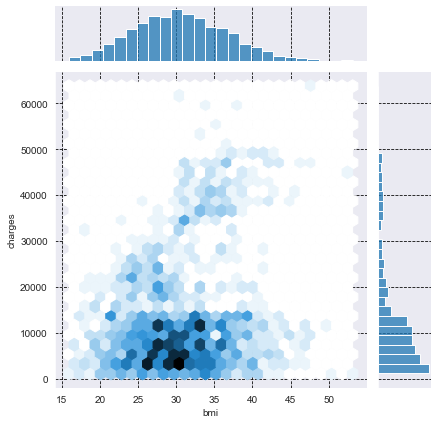

In [75]:
"""
    datas will be displayed in hexagonal shape
"""
sns.jointplot(x="bmi",y="charges",data= insurance_data,kind="hex")

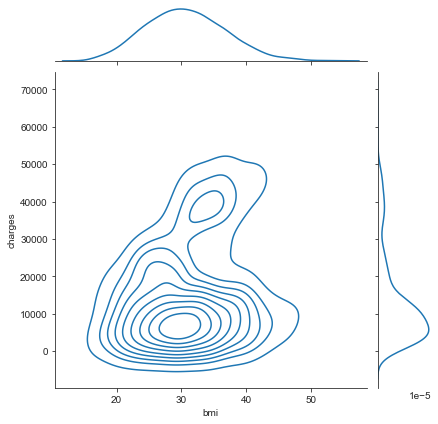

In [76]:
"""
    kde plot in jointplot
"""
#marginal_kws - for marginal plot styling
sns.set_style("ticks")
sns.jointplot(x="bmi",y="charges",s=70,data=insurance_data,kind="kde",linewidth=6)

## JointGrid

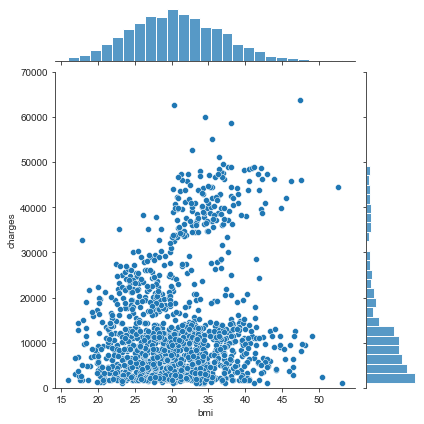

In [77]:
"""
    Plotting bivariate in the center and univariate at the margins
    multiple plots  can be combined
"""
g = sns.JointGrid(x="bmi",y="charges",data=insurance_data,ylim=(0,70000))
g.plot(sns.scatterplot,sns.histplot)
plt.show()

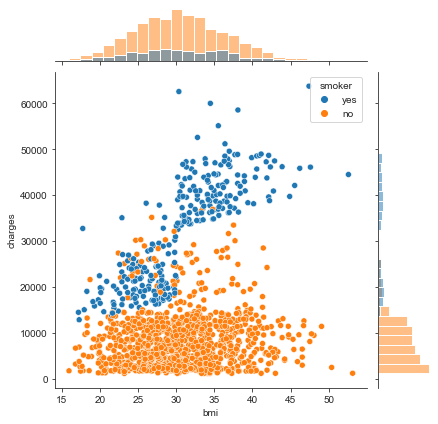

In [78]:
"""
    grouping by smoker column
"""
g = sns.JointGrid(x="bmi",y="charges",data=insurance_data,hue="smoker")
g.plot(sns.scatterplot,sns.histplot)

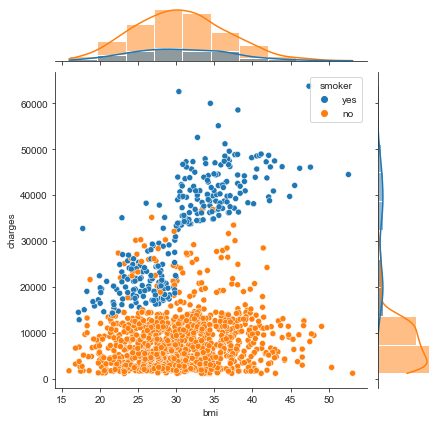

In [79]:
"""
    Grouping by smoker columns and split by margins and joint plot
"""
g = sns.JointGrid(x="bmi",y="charges",data=insurance_data,hue="smoker")
g = g.plot_marginals(sns.histplot,bins=10,kde=True)
g = g.plot_joint(sns.scatterplot)

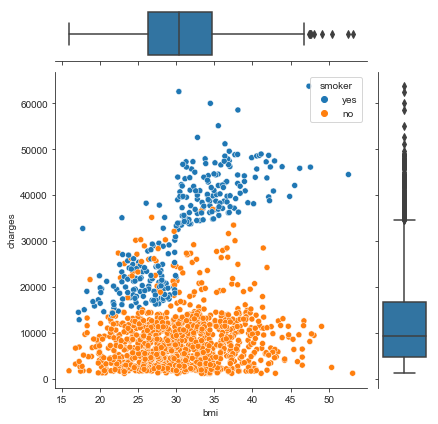

In [80]:
"""
    Combined box and scatter plot
"""
g = sns.JointGrid(x="bmi",y="charges",data=insurance_data,hue="smoker")
g = g.plot_marginals(sns.boxplot)
g = g.plot_joint(sns.scatterplot)

BMI mean is 31(x_mean) and Charges mean is 13270(y_mean)


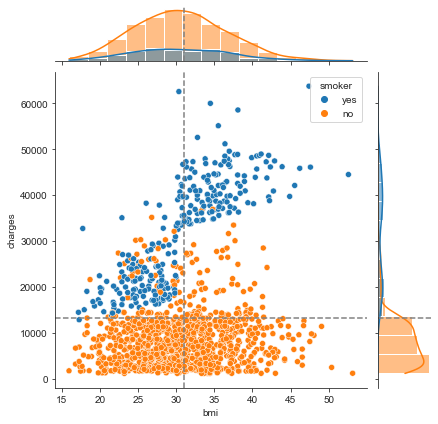

In [81]:
"""
    Grouping by smoker column
    Making the lines in the plot by mean of BMI and Charges columns
    refline - is used to create a line in the plot
    
    1.In this plot 70% of the users from overall are not smokers and their charges are below than y_mean(13270)
    
    2.below avarage BMI(x_mean=31) 70% of the users are not smokers and 60% users are having charges below than y_mean(13270)
    
    3.All the smokers except one are having charges more than y_mean(13270) and vice versa
    
"""
x_mean , y_mean = round(insurance_data['bmi'].mean()),round(insurance_data['charges'].mean())
print(f"BMI mean is {x_mean}(x_mean) and Charges mean is {y_mean}(y_mean)")
g = sns.JointGrid(x="bmi",y="charges",data=insurance_data,hue="smoker")
g = g.plot_marginals(sns.histplot,bins=15,kde=True)
g = g.plot_joint(sns.scatterplot)
g.refline(x=x_mean,y=y_mean) #used to create a line in the plot
plt.show()
